# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import deque
import datetime as dt
import mplfinance 
from renkodf import Renko
from scipy.signal import lfilter
import fx # personal functions
# import MetaTrader5 as mt5

In [3]:
# def pine_ema(src, length):
#     # Ensure src is a pandas Series or DataFrame column
#     if isinstance(src, pd.DataFrame):
#         src = src.iloc[:,  0]  # Assuming the first column for simplicity
#     elif isinstance(src, pd.Series):
#         pass  # src is already in the correct format
#     else:
#         raise ValueError("src must be a pandas Series or DataFrame column.")
    
#     # Initialize the EMA series
#     ema = pd.Series(index=src.index)
    
#     # Calculate the first EMA value
#     ema.iloc[0] = src.iloc[0]
    
#     # Calculate the rest of the EMA values
#     for i in range(1, len(src)):
#         alpha =  2 / (length +  1)
#         if pd.isna(ema.iloc[i-1]):
#             ema.iloc[i] = src.iloc[i]
#         else:
#             ema.iloc[i] = alpha * src.iloc[i] + (1 - alpha) * ema.iloc[i-1]
    
#     return ema


In [30]:
# def emaEma(source, length):
#     # find the ema of source
#     res1 = source.ewm(span=length).mean()
#     res2 = res1.ewm(span=length).mean().values
#     return res2
    
    

In [33]:
# highesthigh = 1.07660
# lowestLow = 1.7598
# close = 1.07463
# lengthD = 3
# lengthK = 10

# highestLowestRange = highesthigh - lowestLow
# relativeRange = close - ((highesthigh + lowestLow) / 2)

# # place highestLowestRange and relativeRange into a dataframe
# df_hlr = pd.DataFrame({'highestLowestRange': 0.001}, index = range(0, 1))
# df_rr = pd.DataFrame({'relativeRange': 0.00028}, index = range(0, 1))

# smi = 200 * (emaEma(df_hlr, lengthD) / emaEma(df_rr, lengthD))
# smi

array([[714.28571429]])

In [31]:
# print(emaEma(df_hlr, lengthD))
# print(emaEma(df_rr, lengthD))

[[-0.6832]]
[[-0.34215]]


# Gathering Data

In [3]:
# collect the actual data from csv file
# filename = "C:/Users/WilliamFetzner/Documents/Trading/DAT_XLSX_EURUSD_M1_2023.xlsx"
# exported from tickstory
tickstory_filename = "C:/Users/WilliamFetzner/Documents/Trading/3mo_EURUSD.csv"
filename = "C:/Users/WilliamFetzner/Documents/Trading/EURUSD1_2_10_24.csv"
full_filename = "C:/Users/WilliamFetzner/Documents/Trading/EURUSD1.csv"
# df = pd.read_csv(filename, header=None, names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])
df = pd.read_csv(tickstory_filename)#, header=None, names=['Timestamp','Bid price','Ask price','Bid volume','Ask volume'])
# df_full = pd.read_csv(full_filename, header=None, names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])
df.head(10)

,Timestamp,Bid price,Ask price,Bid volume,Ask volume
0,20231113 19:00:00:022,1.07013,1.07015,0.12,0.9
1,20231113 19:00:00:229,1.07014,1.07016,1.89,0.9
2,20231113 19:00:00:762,1.07016,1.07018,0.12,4.5
3,20231113 19:00:00:867,1.07015,1.07018,5.40,0.9
4,20231113 19:00:00:970,1.07016,1.07019,4.59,0.9
5,20231113 19:00:04:314,1.07016,1.07020,3.69,0.9
6,20231113 19:00:06:243,1.07016,1.07019,0.12,3.6
7,20231113 19:00:07:285,1.07016,1.07020,3.69,0.9
8,20231113 19:00:07:387,1.07016,1.07019,0.12,3.6
9,20231113 19:00:08:849,1.07016,1.07020,3.69,0.9


In [4]:
# convert date to datetime
df['datetime'] = pd.to_datetime(df['Timestamp'], format='%Y%m%d %H:%M:%S:%f')
# rename bid price to close
df.rename(columns={'Bid price':'close'}, inplace=True)
df_ready = df.set_index('datetime')
# adjust the datetime 7 hrs ahead to match market time
df_ready.index = df_ready.index + pd.Timedelta(hours=7)
# df_tick_ready_2024 = df_ready['2024-01-01':'2024-02-13']
# df_full['datetime'] = pd.to_datetime(df_full['date'] + ' ' + df_full['time'], format='%Y.%m.%d %H:%M')
# filter the data to just 2024
# df_full_2024 = fx.prep_data(df_full, 2024)
# ohlc = fx.prep_data(df, 2024)

In [5]:
ohlc = df_ready[['close']]
ohlc

,close
datetime,
2023-11-14 02:00:00.022,1.07013
2023-11-14 02:00:00.229,1.07014
2023-11-14 02:00:00.762,1.07016
2023-11-14 02:00:00.867,1.07015
2023-11-14 02:00:00.970,1.07016
...,...
2024-02-14 01:59:44.162,1.07083
2024-02-14 01:59:48.793,1.07083
2024-02-14 01:59:49.098,1.07083


In [6]:
# filter to everything after 1/29/2024 03:32
# ohlc = ohlc[ohlc.index >= dt.datetime(2024, 1, 29, 5, 32)]

In [7]:
# filter df_full_2024 to everything after 2024-02-04
# ohlc = df_2024[df_2024.index > dt.datetime(2024, 2, 4)] 
# ohlc

# Getting Data Ready

In [8]:
# df_2023.columns

In [9]:
# ohlc = df_ready.loc[:, ['datetime', 'open', 'high', 'low', 'close']]
# # convert datetime to index
# ohlc = ohlc.set_index('datetime')

# # filter ohlc to just be between December 1st and December 31st
# ohlc_dec = ohlc.loc['2023-12-01':'2023-12-31']
# # filter to just the first day
# ohlc_dec_1 = ohlc_dec.loc['2023-12-04']
# # combine the times into a 15 min interval
# ohlc_dec_1_day_15_min = ohlc_dec_1.resample('15min').agg({'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last'})

# ohlc_dec_1_day_15_min

# Exploratory Data Analysis
To make sure that the PSAR and Impulse are correctly duplicated from Pinescript to python

In [10]:
# ohlc.open.count()
# 1819/322638 old data
# 0.5% of the time it skips minutes
# and 100 of those it was skipping 2 hrs

# 89/371342
# 0.02% of the time it skips minutes
# and the largest range of skips is 3-28 minutes 
# for an avg of 7 minutes


In [11]:

# # find the difference in minutes between each row
# ohlc['diff'] = ohlc.index.to_series().diff().dt.total_seconds().div(60, fill_value=0)
# # find the difference in days between each row, place a 0 if it is the same day
# ohlc['diff_day'] = ohlc.index.to_series().diff().dt.days.fillna(0)
# # filter to where the diff is > 1 but the diff_day is 0
# ohlc_fil = ohlc.loc[(ohlc['diff'] > 1) & (ohlc['diff_day'] == 0)]
# # sort ohlc_fil by the diff column
# ohlc_fil = ohlc_fil.sort_values(by=['diff'], ascending=False)
# ohlc_fil.head(90)
# # find the avg of diff
# ohlc_fil['diff'].mean()


In [12]:
# filter ohlc to be between march 23rd 12:00 and march 23rd 19:00
# ohlc_march_23 = ohlc.loc['2023-03-23 14:00':'2023-03-23 18:00']
# ohlc_march_23

# Calculations

## PSAR Calculation

In [13]:
# # Define inputs
# start = 0.02
# increment = 0.02
# maximum = 0.2
# width = 2
# highlightStartPoints = True
# showLabels = True
# highlightState = True


# # Calculate PSAR
# high = np.array(ohlc_dec_1_day_15_min['high']) # replace with actual high prices
# low = np.array(ohlc_dec_1_day_15_min['low']) # replace with actual low prices
# close = np.array(ohlc_dec_1_day_15_min['close']) # replace with actual closing prices
# psar_obj = fx.PSAR(start, increment, maximum)
# psar = np.empty_like(high)
# for i in range(len(high)):
#    psar[i] = psar_obj.calcPSAR(high[i], low[i])


# # Determine direction
# dir = np.where(psar < close, 1, -1)

# # Create DataFrame
# df_psar = pd.DataFrame({
#    'Close': close,
#    'PSAR': psar,
#    'Direction': dir
# })

# # add a new column to the dataframe that is 'red' if the psar is above the close and 'green' if the psar is below the close
# df_psar['Color'] = np.where(df_psar['PSAR'] > df_psar['Close'], 'red', 'green')




In [14]:
# df_psar

## Impulse MACD Calculation

In [15]:
# Calculate Impulse MACD
# df_impulse = fx.calc_impulse_macd(ohlc_dec_1_day_15_min)
# df_impulse

In [16]:
# # remove all rows with null values for sh
# df_impulse_no_sh_na = df_impulse.dropna(subset=['sh'])
# # find the max and min of sh
# sh_max = df_impulse_no_sh_na['sh'].max()
# sh_min = df_impulse_no_sh_na['sh'].min()


In [17]:
# # remove all rows with null values for sb
# df_impulse_no_sb_na = df_impulse.dropna(subset=['sb'])
# # find the max and min of sb
# sb_max = df_impulse_no_sb_na['sb'].max()
# sb_min = df_impulse_no_sb_na['sb'].min()

In [18]:
# y_min = min(sh_min, sb_min)
# y_max = max(sh_max, sb_max)

In [19]:
# # find crossover points of sh and sb by seeing when the sign of 'md' goes from being > 0 to < 0, or vice versa but don't include 0
# df_impulse['md_sign'] = np.sign(df_impulse['md'])

# # crossover would be when 'md_sign' == 1 or -1 and the previous value of 'md_sign' was 0 or -1 or 1 respectively
# df_impulse['crossover'] = np.where((df_impulse['md_sign'] == 1) & ((df_impulse['md_sign'].shift(1) == 0) | (df_impulse['md_sign'].shift(1) == -1)), 1, 
#                                 np.where((df_impulse['md_sign'] == -1) & ((df_impulse['md_sign'].shift(1) == 0) | (df_impulse['md_sign'].shift(1) == 1)), -1, 0))

# # filter to just where crossover is not 0
# df_impulse_crossover = df_impulse.loc[df_impulse['crossover'] != 0]
# df_impulse_crossover

In [20]:
# # filter to between 1 am and 2 am
# df_impulse_signal_1_to_2 = df_impulse.between_time('8:30', '9:30')
# df_impulse_signal_1_to_2

In [21]:
def find_min_max(df, col):
    df_no_na = df.dropna(subset=[col])
    min = df_no_na[col].min()
    max = df_no_na[col].max()
    return min, max

In [22]:
import matplotlib.pyplot as plt

# Assuming 'df_impulse' is your DataFrame and it has been processed by 'calc_impulse_macd' function
def impulse_graph(df_impulse, col1, col2):
    sh_min, sh_max = find_min_max(df_impulse, col1)
    sb_min, sb_max = find_min_max(df_impulse, col2)
    
    y_min = min(sh_min, sb_min)
    y_max = max(sh_max, sb_max)
    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the Impulse Histogram
    ax.plot(df_impulse[col1], label='ImpulseSignal', color='blue')

    # Plot the Impulse MACD CD Signal
    ax.plot(df_impulse[col2], label='ImpulseMACDSignal', color='orange')

    # change the x axis to be much smaller and go from the max of sh and sb to the min of sh and sb
    ax.set_ylim([y_min - 0.000001, y_max + 0.000001])

    # Add legend
    ax.legend()

    fig.set_size_inches(18.5, 10.5)

    # Show the plot
    plt.show()


## Plotting

In [23]:
# # Plot
# fig, ax = plt.subplots()
# mplfinance.plot(ohlc_dec_1_day_15_min, type='candle', ax=ax, volume=False, show_nontrading=False)
# # add the psar scatterplot to the chart
# plt.scatter(df_psar.index, df_psar['PSAR'], color=df_psar['Color'], lw=0.5, label='PSAR')
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# fig.suptitle('EURUSD 12/1/2023 15-min candlestick chart w/ PSAR')
# # increase the size of the chart
# fig.set_size_inches(18.5, 10.5)

# plt.show()

## Renko Charts

In [24]:
# # create a renko chart from the ohlc_dec_1 dataframe
# r = Renko(ohlc_dec_1, brick_size=0.0003)
# # create a new dataframe from the renko features
# renko_df_ready = r.renko_df()
# renko_high = np.array(renko_df_ready['high'])
# renko_low = np.array(renko_df_ready['low'])
# renko_close = np.array(renko_df_ready['close'])
# # recalculate psar for the renko chart
# psar_renko = np.empty_like(renko_high)
# for i in range(len(renko_high)):
#    psar_renko[i] = psar_obj.calcPSAR(renko_high[i], renko_low[i])
# # Create DataFrame
# df_psar_renko = pd.DataFrame({
#    'Close': renko_close,
#    'PSAR': psar_renko,
# })
# # add a new column to the dataframe that is 'red' if the psar is above the close and 'green' if the psar is below the close
# df_psar_renko['Color'] = np.where(df_psar_renko['PSAR'] > df_psar_renko['Close'], 'red', 'green')

# # plot the renko chart
# fig, ax = plt.subplots()
# mplfinance.plot(renko_df_ready, type='candle', ax=ax, volume=False, show_nontrading=False)
# # add the psar scatterplot to the chart
# plt.scatter(df_psar_renko.index, df_psar_renko['PSAR'], color=df_psar_renko['Color'], lw=0.5, label='PSAR')
# ax.set_xlabel('Time')
# ax.set_ylabel('Price')
# fig.suptitle('EURUSD 12/4/2023 Renko chart w/ PSAR')
# # increase the size of the chart
# fig.set_size_inches(18.5, 10.5)

# plt.show()



In [25]:
# df_psar_renko.index

# Testing Data

## Parameters

In [26]:
# Renko variable
brick_size = 0.0003

# psar variables
start = 0.02
increment = 0.02
maximum = 0.2

# impulse variables
lengthMA = 34
lengthSignal = 9

## Nova Optimized Parameters

In [27]:
# # Renko variable
# brick_size = 0.00007

# # psar variables
# start = 0.139862
# increment = 0.139862
# maximum = 0.451

# # impulse variables
# lengthMA = 10
# lengthSignal = 8

## MSolutions Optimized Parameters

In [28]:
# # Renko variable
# brick_size = 0.00091

# # psar variables
# start = 0.0385
# increment = 0.0385
# maximum = 0.34499

# # impulse variables
# lengthMA = 51
# lengthSignal = 31

In [29]:
# Lot Size
lot_size = 2
per_lot = 100000

# stop loss
stop_loss = brick_size*2

# take profit
take_profit_size = brick_size*4

# Commissions
nova_commission = lot_size * -3
msolutions_commission = lot_size * -5

# starting balance
balance = 200000

# base currency rate
base_currency_rate = 0.045 # EUR
quote_currency_rate = 0.055 # USD

In [1]:
14/100000

0.00014

## Renko charts (from 1 min data)

In [65]:
# create a renko chart from the ohlc_dec_1 dataframe
r_full = Renko(ohlc, brick_size=brick_size)
# create a new dataframe from the renko features
renko_full_data = r_full.renko_df()
renko_full_data = fx.psar_from_data(renko_full_data, increment, maximum)
renko_full_data.tail(10)

,open,high,low,close,volume,psar,psar_signal
datetime,,,,,,,
2024-02-13 18:24:41.746,1.0716,1.07190,1.07127,1.0719,364.0,1.072643,sell
2024-02-13 19:22:39.646,1.0716,1.07214,1.07130,1.0713,4691.0,1.072588,sell
2024-02-13 19:37:28.380,1.0716,1.07190,1.07122,1.0719,802.0,1.072535,sell
2024-02-13 20:22:08.406,1.0716,1.07201,1.07130,1.0713,2783.0,1.072456,sell
2024-02-13 20:51:46.414,1.0713,1.07138,1.07100,1.0710,1270.0,1.072382,sell
2024-02-13 21:01:07.195,1.0710,1.07100,1.07070,1.0707,460.0,1.072271,sell
2024-02-13 21:03:38.372,1.0707,1.07070,1.07040,1.0704,224.0,1.072114,sell
2024-02-13 21:58:23.352,1.0704,1.07068,1.07010,1.0701,3636.0,1.071909,sell
2024-02-13 22:25:40.512,1.0704,1.07070,1.07005,1.0707,1825.0,1.071655,sell


In [66]:
# Add the Impulse MACD CD Signal to the renko_full_data dataframe
renko_full_data = fx.calc_impulse_macd(renko_full_data, lengthMA, int(lengthSignal))

# crossover would be when 'sh_sign' == 1 or -1 and the previous value of 'sh_sign' was 0 or -1 or 1 respectively
renko_full_data['crossover'] = np.where((renko_full_data['sh_sign'] == 1) & ((renko_full_data['sh_sign'].shift(1) == 0) | (renko_full_data['sh_sign'].shift(1) == -1)), 1, 
                                np.where((renko_full_data['sh_sign'] == -1) & ((renko_full_data['sh_sign'].shift(1) == 0) | (renko_full_data['sh_sign'].shift(1) == 1)), -1, 0))
renko_full_data.tail(10)

,open,high,low,close,volume,psar,psar_signal,hlc3,hi,lo,mi,md,sb,sh,sh_sign,impulse_signal,crossover
datetime,,,,,,,,,,,,,,,,,
2024-02-13 18:24:41.746,1.0716,1.07190,1.07127,1.0719,364.0,1.072643,sell,1.071690,1.072972,1.072422,1.071190,-0.001232,-0.001462,0.000231,1.0,buy,0
2024-02-13 19:22:39.646,1.0716,1.07214,1.07130,1.0713,4691.0,1.072588,sell,1.071580,1.072947,1.072389,1.071199,-0.001190,-0.001400,0.000211,1.0,buy,0
2024-02-13 19:37:28.380,1.0716,1.07190,1.07122,1.0719,802.0,1.072535,sell,1.071673,1.072916,1.072354,1.071218,-0.001136,-0.001344,0.000208,1.0,buy,0
2024-02-13 20:22:08.406,1.0716,1.07201,1.07130,1.0713,2783.0,1.072456,sell,1.071537,1.072890,1.072323,1.071222,-0.001101,-0.001292,0.000191,1.0,buy,0
2024-02-13 20:51:46.414,1.0713,1.07138,1.07100,1.0710,1270.0,1.072382,sell,1.071127,1.072845,1.072284,1.071181,-0.001103,-0.001244,0.000141,1.0,buy,0
2024-02-13 21:01:07.195,1.0710,1.07100,1.07070,1.0707,460.0,1.072271,sell,1.070800,1.072791,1.072238,1.071108,-0.001130,-0.001207,0.000078,1.0,buy,0
2024-02-13 21:03:38.372,1.0707,1.07070,1.07040,1.0704,224.0,1.072114,sell,1.070500,1.072730,1.072184,1.071009,-0.001175,-0.001185,0.000010,1.0,buy,0
2024-02-13 21:58:23.352,1.0704,1.07068,1.07010,1.0701,3636.0,1.071909,sell,1.070293,1.072669,1.072122,1.070896,-0.001227,-0.001176,-0.000051,-1.0,sell,-1
2024-02-13 22:25:40.512,1.0704,1.07070,1.07005,1.0707,1825.0,1.071655,sell,1.070483,1.072611,1.072061,1.070815,-0.001247,-0.001171,-0.000076,-1.0,sell,0


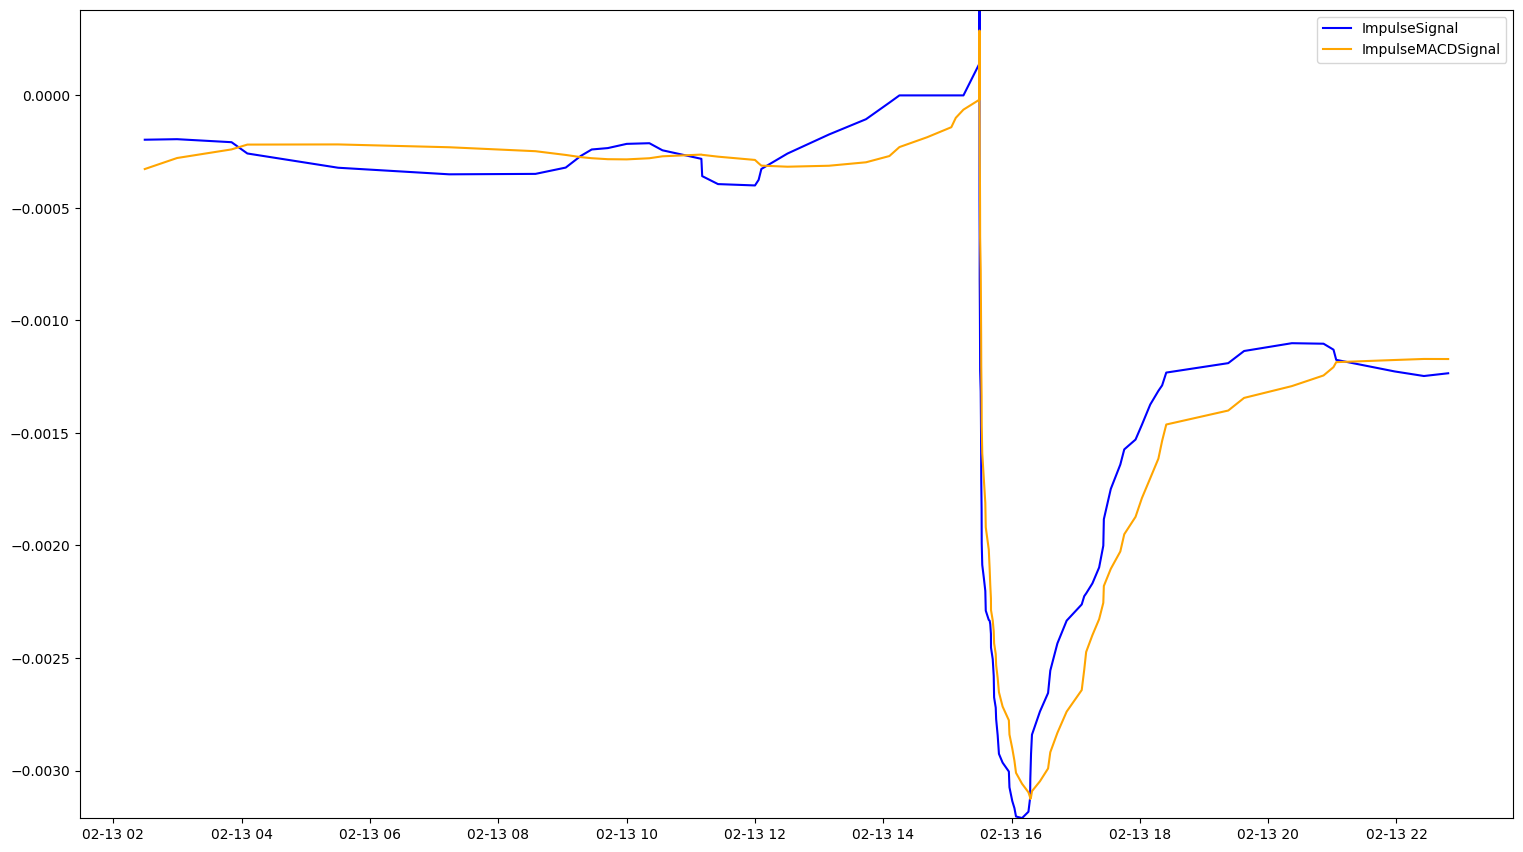

In [67]:
# find the max of renko_full_data.index
max_index = renko_full_data.index.max()
# filter to just the day in the max_index
renko_full_data_max_day = renko_full_data.loc[renko_full_data.index.date == max_index.date()]
impulse_graph(renko_full_data_max_day, 'md', 'sb')

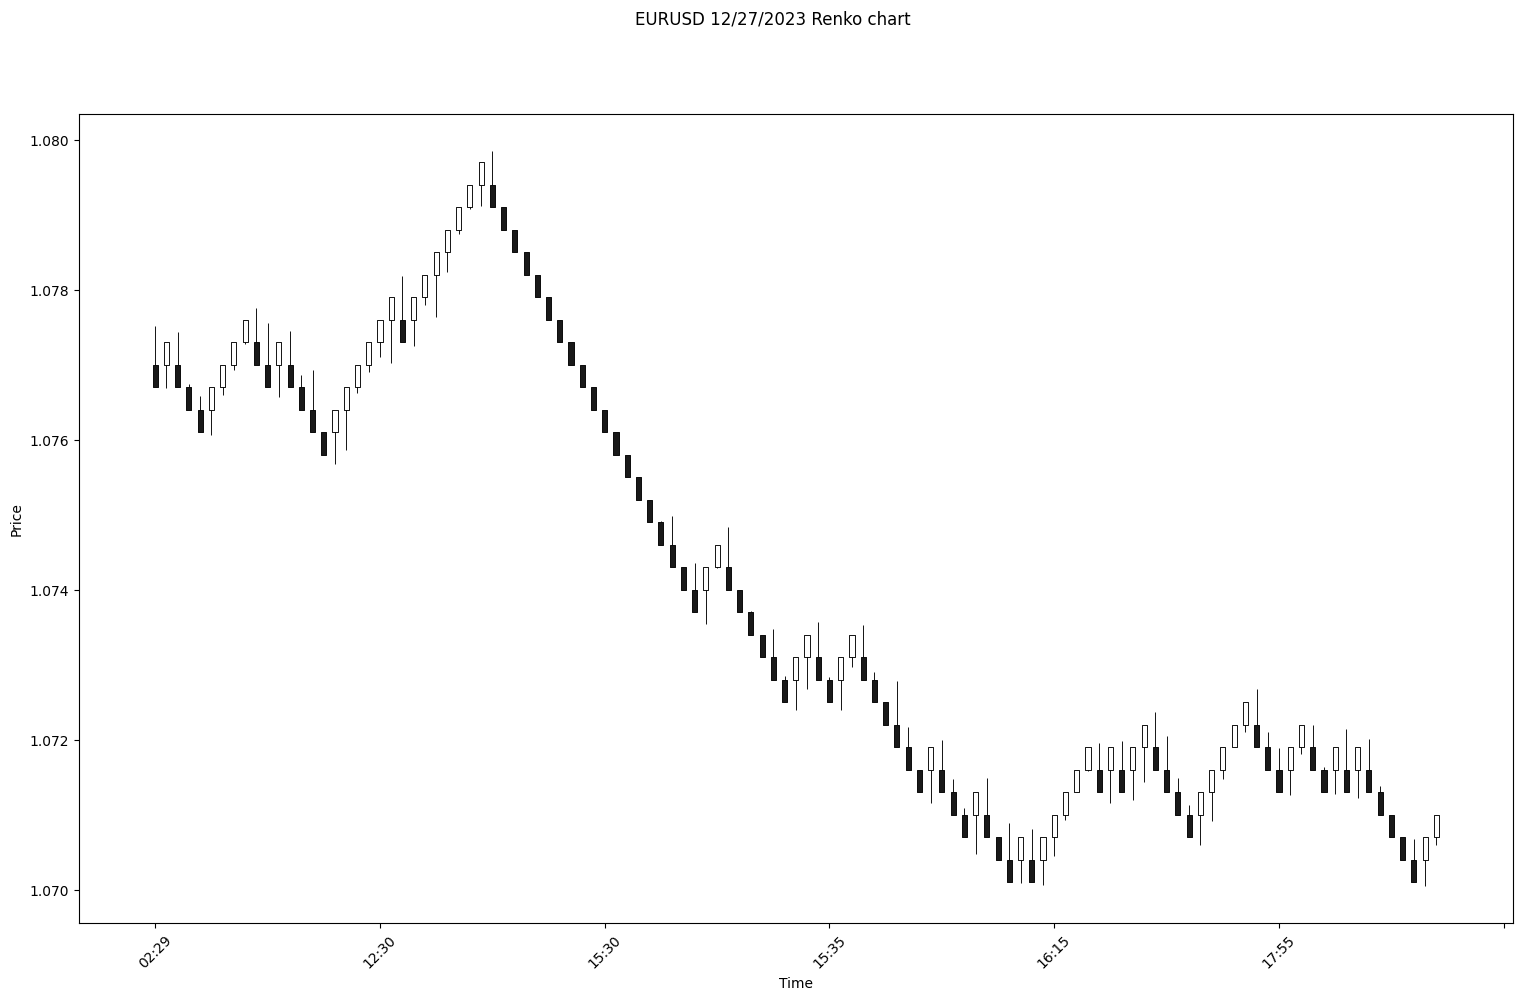

In [68]:
# plot the renko chart
fig, ax = plt.subplots()
mplfinance.plot(renko_full_data_max_day, type='candle', ax=ax, volume=False, show_nontrading=False)
# add the psar scatterplot to the chart
# plt.scatter(df_psar_renko.index, df_psar_renko['PSAR'], color=df_psar_renko['Color'], lw=0.5, label='PSAR')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
fig.suptitle('EURUSD 12/27/2023 Renko chart')
# increase the size of the chart
fig.set_size_inches(18.5, 10.5)

plt.show()

In [69]:
# add a column to renko_full_data that will indicate the color of the renko brick based on the "open" and "close" columns of the renko_full_data dataframe, 
# if the open is greater than the close then the color is red, otherwise it is green
renko_full_data['brick_color'] = np.where(renko_full_data['open'] > renko_full_data['close'], 'red', 'green')

In [70]:
# add the day of the week to the dataframe
renko_full_data['day_of_week'] = renko_full_data.index.day_name()
# place a 1 in day_of_week_transition, if it is the last bar on Friday and the next bar is Sunday
renko_full_data['day_of_week_transition'] = np.where((renko_full_data['day_of_week'] == 'Friday') & 
                                                     ((renko_full_data['day_of_week'].shift(-1) == 'Sunday') | (renko_full_data['day_of_week'].shift(-1) == 'Monday') |
                                                      (renko_full_data['day_of_week'].shift(-1) == 'Tuesday')), 1, 0)

In [71]:
renko_full_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'psar', 'psar_signal', 'hlc3',
       'hi', 'lo', 'mi', 'md', 'sb', 'sh', 'sh_sign', 'impulse_signal',
       'crossover', 'brick_color', 'day_of_week', 'day_of_week_transition'],
      dtype='object')

## Entry conditions

In [76]:
def add_entry_signal(df_init, psar, impulse):
    if 'entry_signal' not in df_init.columns:
        # find the length of the dataframe
        len_df = len(df_init.index)
        # create a list of 'none' that is the same length as the dataframe
        entry_signal_list = ['none'] * len_df
        # create a new dataframe that has the same index as df_init and an 'entry_signal' column that is all 'none'
        df_entry = pd.DataFrame({'entry_signal': entry_signal_list}, index=df_init.index)
        # merge df_init with df_entry
        df_fil = pd.merge(df_init, df_entry, left_index=True, right_index=True, how='left')

    elif 'entry_signal' in df_init.columns:
        # filter to just the rows where 'entry_signal' is 'none'
        df_fil = df_init.loc[df_init['entry_signal'] == 'none']
    print(len(df_fil.brick_color))
    if (psar == True) & (impulse == True):
        print('psar and impulse true')
        df_fil['entry_signal'] = np.where((df_fil['psar_signal'] == 'buy') & (df_fil['impulse_signal'] == 'buy') & 
                                           (df_fil['brick_color'] == 'green') & (df_fil['day_of_week_transition'] != 1), 'long', 
                                        np.where((df_fil['psar_signal'] == 'sell') & (df_fil['impulse_signal'] == 'sell') & 
                                                 (df_fil['brick_color'] == 'red') & (df_fil['day_of_week_transition'] != 1), 'short', 
                                                 df_fil['entry_signal']))
    elif (psar == True) & (impulse != True):
        print('psar true')
        df_fil['entry_signal'] = np.where((df_fil['psar_signal'] == 'buy') & 
                                      (df_fil['brick_color'] == 'green') & (df_fil['day_of_week_transition'] != 1), 'long', 
                                      np.where((df_fil['psar_signal'] == 'sell') & 
                                               (df_fil['brick_color'] == 'red') & (df_fil['day_of_week_transition'] != 1), 'short', 
                                               df_fil['entry_signal']))
    elif (psar != True) & (impulse == True):
        print('impulse true')
        df_fil['entry_signal'] = np.where((df_fil['impulse_signal'] == 'buy') & 
                                      (df_fil['brick_color'] == 'green') & (df_fil['day_of_week_transition'] != 1), 'long', 
                                      np.where((df_fil['impulse_signal'] == 'sell') & 
                                               (df_fil['brick_color'] == 'red') & (df_fil['day_of_week_transition'] != 1), 'short', 
                                               df_fil['entry_signal']))
    elif (psar != True) & (impulse != True):
        print('neither true')
        df_fil['entry_signal'] = np.where((df_fil['brick_color'] == 'green') & (df_fil['day_of_week_transition'] != 1), 'long', 
                                      np.where((df_fil['brick_color'] == 'red') & (df_fil['day_of_week_transition'] != 1), 'short', 
                                               df_fil['entry_signal']))
    # count the number of 'none' values in df_init
    # count_none = df_init['entry_signal'].eq('none').sum()
    # print('first Init_none:', count_none)
    # replace any 'none' values in df_init with None
    if 'entry_signal' in df_init.columns:
        df_init['entry_signal'] = df_init['entry_signal'].replace('none', None)
        df_fil['entry_signal'] = df_fil['entry_signal'].replace('none', None)
        # count the number of rows that are None in df_init
        count_none = df_init['entry_signal'].isna().sum()
        count_none_fil = df_fil['entry_signal'].isna().sum()
        print('Init_none:', count_none)
        print('Fil_none:', count_none_fil)
        # combine df_fil with df_init
        df = df_init.combine_first(df_fil)
        # replace any None values in df with 'none'
        df['entry_signal'] = df['entry_signal'].replace([None], 'none')
        return df
    else:
        return df_fil

    

In [81]:
def add_entry_prefix(df):
    df['entry_signal'] = np.where(((df['entry_signal'] != 'none') & (df['entry_signal'].shift(1) == 'none')) |
                                           ((df['entry_signal'] == 'long') & (df['entry_signal'].shift(1) == 'short')) |
                                           ((df['entry_signal'] == 'short') & (df['entry_signal'].shift(1) == 'long')),
                                            'entry + ' + df['entry_signal'], df['entry_signal'])
    return df

In [85]:
def add_tp_sl(df, take_profit, stop_loss):
    df['take_profit'] = np.where(df['entry_signal'] == 'entry + long', df['open'] + take_profit, 
                                 np.where(df['entry_signal'] == 'entry + short', df['open'] - take_profit, np.nan))
    df['stop_loss'] = np.where(df['entry_signal'] == 'entry + long', df['open'] - stop_loss, 
                                 np.where(df['entry_signal'] == 'entry + short', df['open'] + stop_loss, np.nan))
    return df

In [86]:
add_tp_sl(renko_entry_added, take_profit_size, stop_loss)
# filter renko_entry_added to where the entry_signal includes "entry"
renko_entry_added_entry = renko_entry_added.loc[renko_entry_added['entry_signal'].str.contains('entry', na=False)]
# select just the entry_signal, open, take_profit, and stop_loss columns
renko_entry_added_entry[['entry_signal', 'open', 'take_profit', 'stop_loss']]

,entry_signal,open,take_profit,stop_loss
datetime,,,,
2023-11-14 11:20:03.179,entry + buy,1.0707,1.0719,1.0701
2023-11-14 15:29:42.577,entry + buy,1.0722,1.0734,1.0716
2023-11-14 15:30:01.187,entry + short,1.0719,1.0707,1.0725
2023-11-14 15:30:01.713,entry + buy,1.0728,1.0740,1.0722
2023-11-14 15:30:02.192,entry + buy,1.0743,1.0755,1.0737
...,...,...,...,...
2024-02-13 16:26:33.961,entry + buy,1.0716,1.0728,1.0710
2024-02-13 16:36:13.851,entry + buy,1.0716,1.0728,1.0710
2024-02-13 17:26:19.364,entry + buy,1.0719,1.0731,1.0713


In [39]:
def add_exit_signal(df):
    df['entry_signal'] = np.where((df['entry_signal'].shift(1) == 'entry + short') & (df['entry_signal'] != 'short'), 'exit', 
                                            np.where((df['entry_signal'].shift(1) == 'short') & (df['entry_signal'] != 'short'), 'exit', 
                                                     np.where((df['entry_signal'].shift(1) == 'entry + long') & (df['entry_signal'] != 'long'), 'exit', 
                                                              np.where((df['entry_signal'].shift(1) == 'long') & (df['entry_signal'] != 'long'), 'exit', 
                                                                       df['entry_signal']))))
    return df

In [45]:
def cum_count(df):
    # position_count will be a cumulative count used to filter the data to the timeframe between the entry 
    # and exit signals so anytime there is an "entry + buy" or "entry + short" the count should increase by 1
    df['position_count'] = np.where(df['entry_signal'] == 'entry + long', 1, np.where(df['entry_signal'] == 'entry + short', 1, 0))
    df['cum_position_count'] = df['position_count'].cumsum()
    # when 'entry_signal' is 'none' then the 'cum_position_count' should be null
    df['cum_position_count'] = np.where(df['entry_signal'] == 'none', np.nan, df['cum_position_count'])
    return df

In [41]:
def sl_tp_exits(df):
    changed = 0
    # group by cum_position_count and forward fill the value in the first index of the 'stop_loss' column
    df['stop_loss'] = df.groupby('cum_position_count')['stop_loss'].ffill()
    df['take_profit'] = df.groupby('cum_position_count')['take_profit'].ffill()

    # determine whether the exit should be sooner because the stop_loss was hit before the exit signal (look at the high/low of the brick)
    df['exit_stop_loss'] = np.where((df['entry_signal'] == 'long') & (df['stop_loss'] > df['low']), 1,
                                            np.where((df['entry_signal'] == 'short') & (df['stop_loss'] < df['high']), 1, 0))
    df['exit_take_profit'] = np.where((df['entry_signal'] == 'long') & (df['take_profit'] < df['high']), 1,
                                            np.where((df['entry_signal'] == 'short') & (df['take_profit'] > df['low']), 1, 0))
    # if there is a 1 in exit_stop_loss or exit_take_profit then set changed to 1
    if (df['exit_stop_loss'] == 1).any() or (df['exit_take_profit'] == 1).any():
        # get the sum of exit_stop_loss and exit_take_profit
        print(df.exit_stop_loss.sum(), df.exit_take_profit.sum())
        changed = 1
    df['exit_stop_loss'] = df.groupby('cum_position_count')['exit_stop_loss'].ffill()
    df['exit_take_profit'] = df.groupby('cum_position_count')['exit_take_profit'].ffill()
    # if entry signal isn't 'none' and exit_stop_loss or exit_take_profit is 1 then the entry signal should be 'none'
    df['entry_signal'] = np.where(((df['entry_signal'] != 'none') & 
                                                ((df['exit_stop_loss'] == 1) | (df['exit_take_profit'] == 1))), 
                                                'none', 
                                                df['entry_signal'])
    return df, changed

In [57]:
# add a column that will be the entry signal for the strategy to be when both impulse_signal and psar_signal are both 'buy' or 'short'
renko_entry_added = add_entry_signal(renko_full_data, True, True)

# # if there was a change from 'none' to 'buy' or 'short' then that is an entry signal and replace the 'buy' or 'short' with 'entry + buy' or 'entry + short'
add_entry_prefix(renko_entry_added)

# # add a stop loss column that will be the entry price +/- the brick size for when the entry signal is 'entry + buy' or 'entry + short'
# add_tp_sl(renko_entry_added, take_profit_size, stop_loss)

# # if the 'entry_signal' colummn goes from 'entry + short' or 'short' to 'none' then 'none' should be replaced with 'exit' in the entry_signal column
# renko_w_exits = add_exit_signal(renko_w_stop_loss)

# # add cumulative count columns
# renko_cum_count = cum_count(renko_w_exits)

# # see if exits should be sooner with stop_loss and take_profit then repeat above steps
# df_changed = 1
# iteration = 0
# while df_changed == 1:
#     renko_entry_added, df_changed = sl_tp_exits(renko_entry_added)
#     # add a column that will be the entry signal for the strategy to be when both impulse_signal and psar_signal are both 'buy' or 'short'
#     renko_entry_added = add_entry_signal(renko_entry_added, True, True)

#     # if there was a change from 'none' to 'buy' or 'short' then that is an entry signal and replace the 'buy' or 'short' with 'entry + buy' or 'entry + short'
#     renko_entry_added = add_entry_prefix(renko_entry_added)

#     # add a stop loss column that will be the entry price +/- the brick size for when the entry signal is 'entry + buy' or 'entry + short'
#     renko_entry_added = add_tp_sl(renko_entry_added, take_profit_size, stop_loss)

#     # if the 'entry_signal' colummn goes from 'entry + short' or 'short' to 'none' then 'none' should be replaced with 'exit' in the entry_signal column
#     renko_entry_added = add_exit_signal(renko_entry_added)

#     # add cumulative count columns
#     renko_entry_added = cum_count(renko_entry_added)
    
#     iteration += 1
    
#     print('iteration:', iteration)


first Init_none: 6923
Init_none: 6923
Fil_none: 13


datetime
2023-11-14 03:22:12.611    short
2023-11-14 04:16:26.712      buy
2023-11-14 07:10:38.623    short
2023-11-14 09:03:17.575      buy
2023-11-14 09:18:28.410      buy
                           ...  
2024-02-13 21:01:07.195    short
2024-02-13 21:03:38.372    short
2024-02-13 21:58:23.352    short
2024-02-13 22:25:40.512      buy
2024-02-13 22:48:21.452      buy
Name: entry_signal, Length: 6923, dtype: object

In [304]:
# add a new column to the dataframe that is 'red' if the psar is above the close and 'green' if the psar is below the close
renko_full_data['color'] = np.where(renko_full_data['psar'] > renko_full_data['close'], 'red', 'green')
renko_df_one_day = renko_full_data.loc[renko_full_data.index.date == dt.datetime(2024, 2, 5).date()]
# reset the index of the dataframe
# psar_one_day = renko_df_one_day.reset_index()
# make a column of just the count
renko_df_one_day['count'] = range(1, len(renko_df_one_day.open) + 1)
# renko_df_one_day

C:\Users\WilliamFetzner\AppData\Local\Temp\ipykernel_18828\1285674186.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renko_df_one_day['count'] = range(1, len(renko_df_one_day.open) + 1)


In [ ]:
renko_df_one_day.loc[:,['high','open', 'close', 'low', 'psar', 'md', 'sb', 'psar_signal', 'impulse_signal']].head(25)

,high,open,close,low,psar,md,sb,psar_signal,impulse_signal
datetime,,,,,,,,,
2024-02-05 00:06:39.211,1.07857,1.0785,1.0782,1.07820,1.079740,-0.001801,-0.001905,sell,buy
2024-02-05 01:04:43.674,1.07858,1.0782,1.0779,1.07790,1.079709,-0.001825,-0.001879,sell,buy
2024-02-05 01:09:43.634,1.07799,1.0779,1.0776,1.07760,1.079637,-0.001877,-0.001860,sell,sell
2024-02-05 01:09:56.716,1.07760,1.0776,1.0773,1.07730,1.079515,-0.001946,-0.001852,sell,sell
2024-02-05 01:19:33.380,1.07743,1.0773,1.0770,1.07700,1.079337,-0.002023,-0.001859,sell,sell
2024-02-05 01:30:32.688,1.07760,1.0773,1.0776,1.07698,1.079104,-0.002058,-0.001880,sell,sell
2024-02-05 01:37:32.829,1.07790,1.0776,1.0779,1.07748,1.078849,-0.002058,-0.001907,sell,sell
2024-02-05 02:00:33.329,1.07812,1.0776,1.0773,1.07730,1.078625,-0.002067,-0.001938,sell,sell
2024-02-05 02:05:00.156,1.07790,1.0776,1.0779,1.07707,1.078427,-0.002057,-0.001968,sell,sell


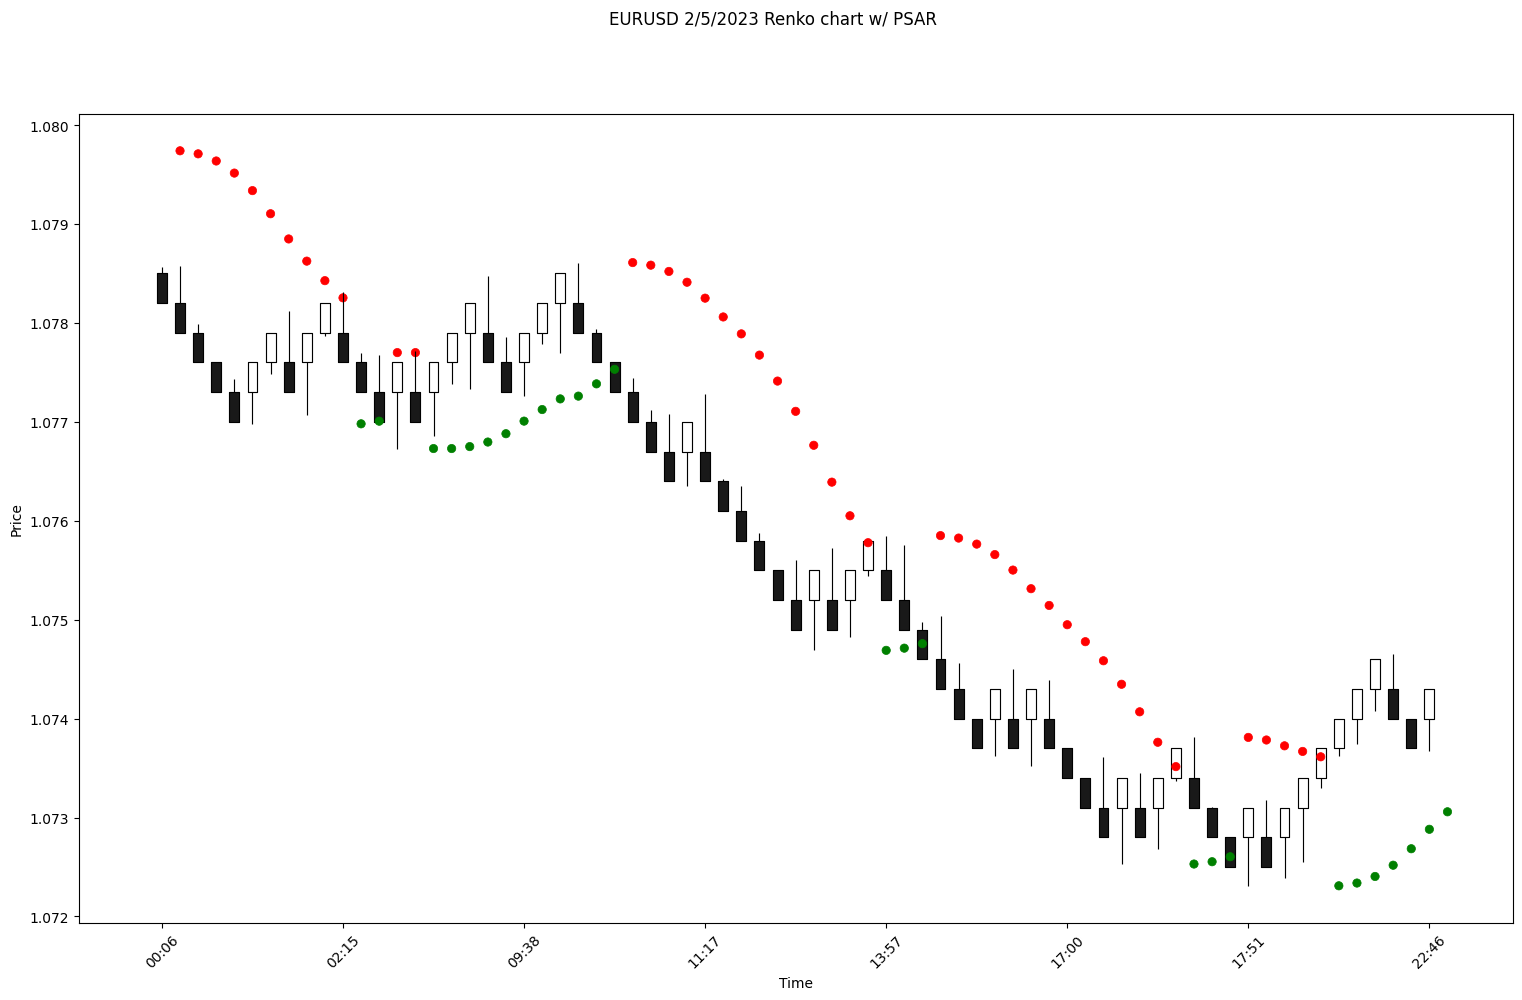

In [209]:
# plot the renko chart
fig, ax = plt.subplots()
mplfinance.plot(renko_df_one_day, type='candle', ax=ax, volume=False, show_nontrading=False)
# add the psar scatterplot to the chart
plt.scatter(renko_df_one_day['count'], renko_df_one_day['psar'], color=renko_df_one_day['color'], lw=0.5, label='PSAR')
ax.set_xlabel('Time')
ax.set_ylabel('Price')
fig.suptitle('EURUSD 2/5/2023 Renko chart w/ PSAR')
# increase the size of the chart
fig.set_size_inches(18.5, 10.5)

plt.show()

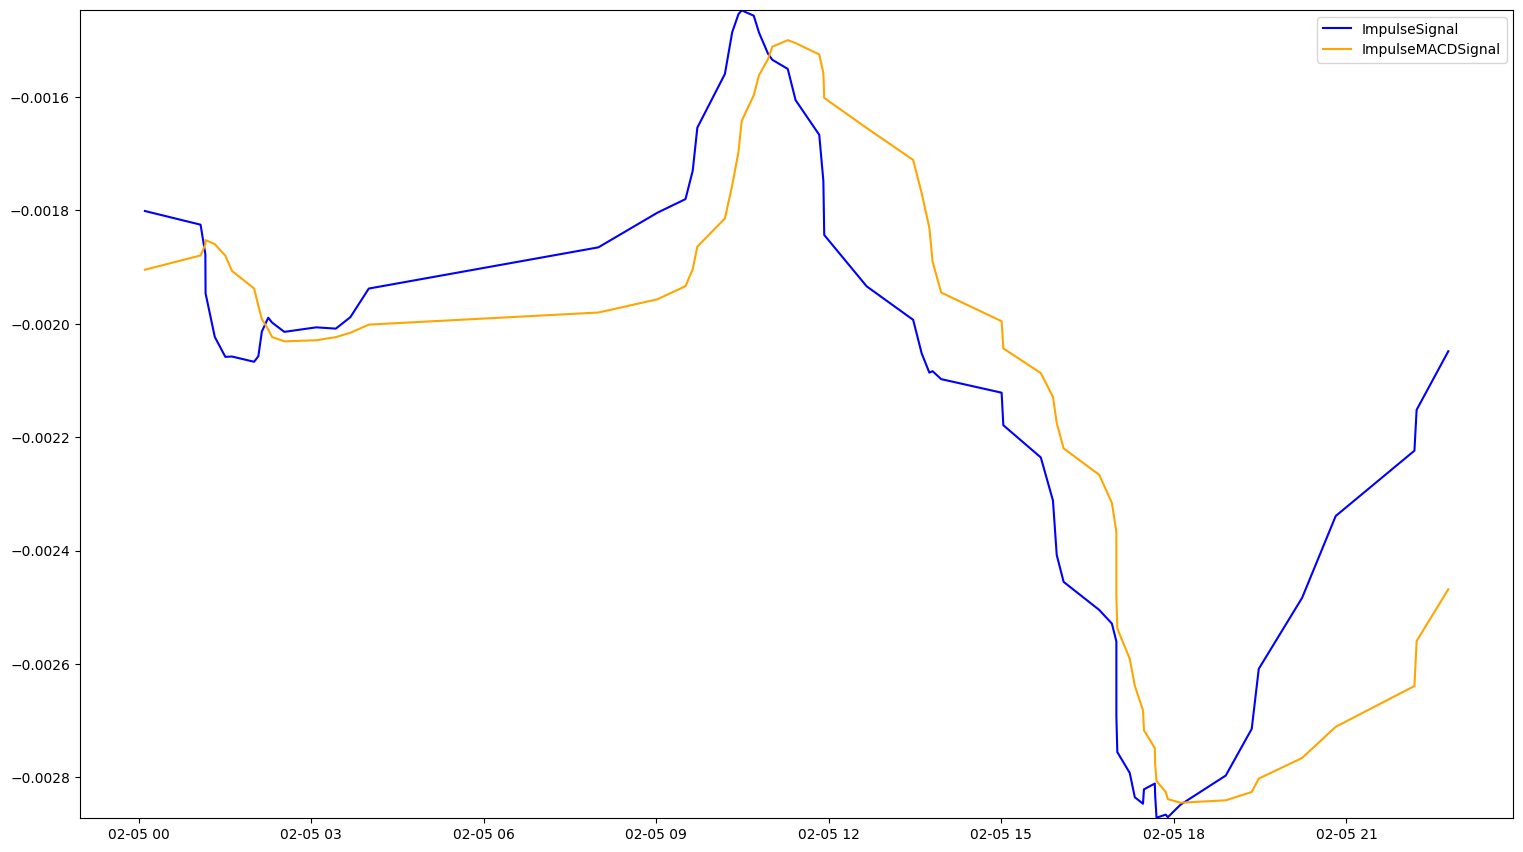

In [210]:
impulse_graph(renko_df_one_day, 'md', 'sb')

In [211]:
# maybe implement this later - right now, let's keep the SL where it is

# # if first_TP_hit is 1 then the stop_loss should be set to the entry close price for that position so we need to group by the cum_position_count
# renko_full_data['stop_loss'] = np.where(renko_full_data['first_TP_hit'] == 1, renko_full_data.groupby('cum_position_count')['close'].transform('first'), renko_full_data['stop_loss'])
# # drop 'stop_loss_test'
# renko_full_data.drop(columns=['stop_loss_test'], inplace=True)
# redetermine whether the new stop_loss was hit after we took the first TP
# renko_full_data['exit_stop_loss'] = np.where((renko_full_data['entry_signal'] == 'buy') & (renko_full_data['stop_loss'] > renko_full_data['low']), 1,
#                                         np.where((renko_full_data['entry_signal'] == 'short') & (renko_full_data['stop_loss'] < renko_full_data['high']), 1, 0))
# renko_full_data.loc[renko_full_data['exit_stop_loss'] == 1]
# happens 908/2371 = 40% of the time

In [212]:
renko_full_data.loc[:,['high','open', 'close', 'low', 'entry_signal', 'stop_loss', 'cum_position_count']].tail(25)

,high,open,close,low,entry_signal,stop_loss,cum_position_count,first_TP_hit,first_TP_goal
datetime,,,,,,,,,
2024-02-13 17:05:37.599,1.07205,1.0716,1.0713,1.07130,none,NaN,NaN,NaN,NaN
2024-02-13 17:07:58.070,1.07149,1.0713,1.0710,1.07100,none,NaN,NaN,NaN,NaN
2024-02-13 17:09:46.049,1.07113,1.0710,1.0707,1.07070,none,NaN,NaN,NaN,NaN
2024-02-13 17:15:36.584,1.07130,1.0710,1.0713,1.07060,none,NaN,NaN,NaN,NaN
2024-02-13 17:21:54.722,1.07160,1.0713,1.0716,1.07091,none,NaN,NaN,NaN,NaN
2024-02-13 17:25:48.944,1.07190,1.0716,1.0719,1.07148,none,NaN,NaN,NaN,NaN
2024-02-13 17:26:19.364,1.07220,1.0719,1.0722,1.07190,entry + buy,1.0713,957.0,0.0,1.0725
2024-02-13 17:32:48.768,1.07250,1.0722,1.0725,1.07210,buy,1.0713,957.0,1.0,1.0725
2024-02-13 17:41:43.273,1.07267,1.0722,1.0719,1.07190,exit,1.0713,957.0,1.0,1.0725


## Find the P/L

In [214]:
profit_df = pd.DataFrame() #columns=['cum_position_count', 'direction', 'entry_price', 'exit_price', 'first_TP_hit', 'profit']
# calculate the profit for each position by first grouping by each position and finding the entry price
profit_df['entry_price'] = renko_full_data.groupby('cum_position_count')['close'].first()
# separate out the datetime column
renko_full_data['datetime'] = renko_full_data.index
profit_df['entry_time'] = renko_full_data.groupby('cum_position_count')['datetime'].first()
profit_df['exit_time'] = renko_full_data.groupby('cum_position_count')['datetime'].last()
# # determine the exit price
profit_df['exit_price'] = renko_full_data.groupby('cum_position_count')['close'].last()

# # what was the direction, buy or short?
profit_df['direction'] = renko_full_data.groupby('cum_position_count')['entry_signal'].first()
profit_df['direction'] = profit_df['direction'].str.split('+').str[1]

# what if I didn't take the first TP?
profit_df['profit'] = np.where((profit_df['direction'].str.strip() == 'buy'),
                                            (profit_df['exit_price'] - profit_df['entry_price'])*per_lot*(lot_size), 
                                            np.where((profit_df['direction'].str.strip() == 'short'),
                                                    (profit_df['entry_price'] - profit_df['exit_price'])*per_lot*(lot_size), np.nan))

### Swap Rates

In [215]:
# find the positions where the period in between the entry_time and exit_time include 5:00 pm 
profit_df = fx.add_swap_rates(profit_df, base_currency_rate, quote_currency_rate, lots=lot_size)
profit_df

,entry_price,entry_time,exit_time,first_TP_hit,exit_price,direction,secondary_profit,primary_profit,profit,swap,swap_rate
cum_position_count,,,,,,,,,,,
1.0,1.0710,2023-11-14 11:20:03.179,2023-11-14 12:44:02.734,1.0,1.0722,buy,120.0,30.0,240.0,0,0.0
2.0,1.0725,2023-11-14 15:29:42.577,2023-11-14 15:30:01.133,0.0,1.0719,buy,-120.0,0.0,-120.0,0,0.0
3.0,1.0716,2023-11-14 15:30:01.187,2023-11-14 15:30:01.239,1.0,1.0713,short,30.0,30.0,60.0,0,0.0
4.0,1.0731,2023-11-14 15:30:01.713,2023-11-14 15:30:01.931,1.0,1.0737,buy,60.0,30.0,120.0,0,0.0
5.0,1.0746,2023-11-14 15:30:02.192,2023-11-14 15:30:02.244,1.0,1.0743,buy,-30.0,30.0,-60.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
955.0,1.0719,2024-02-13 16:26:33.961,2024-02-13 16:34:09.845,0.0,1.0713,buy,-120.0,0.0,-120.0,0,0.0
956.0,1.0719,2024-02-13 16:36:13.851,2024-02-13 16:51:32.311,1.0,1.0716,buy,-30.0,30.0,-60.0,0,0.0
957.0,1.0722,2024-02-13 17:26:19.364,2024-02-13 17:41:43.273,1.0,1.0719,buy,-30.0,30.0,-60.0,0,0.0


In [216]:
# filter to just the locations where the swap rate is 1
profit_df.loc[profit_df['swap'] == 1]

,entry_price,entry_time,exit_time,first_TP_hit,exit_price,direction,secondary_profit,primary_profit,profit,swap,swap_rate
cum_position_count,,,,,,,,,,,
17.0,1.0830,2023-11-14 16:53:28.007,2023-11-14 17:05:13.767,1.0,1.0827,buy,-30.0,30.0,-60.0,1,-5.060914
34.0,1.0848,2023-11-15 16:40:37.566,2023-11-15 17:05:36.816,1.0,1.0839,short,90.0,30.0,180.0,1,0.000000
42.0,1.0875,2023-11-16 16:49:24.336,2023-11-16 17:17:59.433,1.0,1.0884,buy,90.0,30.0,180.0,1,-5.034410
94.0,1.0875,2023-11-22 16:55:59.426,2023-11-22 17:21:51.242,1.0,1.0860,short,150.0,30.0,300.0,1,0.000000
109.0,1.0929,2023-11-24 16:51:14.589,2023-11-24 17:17:14.759,1.0,1.0938,buy,90.0,30.0,180.0,1,-5.009556
117.0,1.0944,2023-11-27 15:57:50.233,2023-11-27 17:01:23.473,1.0,1.0932,short,120.0,30.0,240.0,1,0.000000
130.0,1.0983,2023-11-28 16:47:17.818,2023-11-28 17:00:31.049,0.0,1.0977,buy,-120.0,0.0,-120.0,1,-4.991757
193.0,1.0878,2023-12-01 15:32:59.056,2023-12-01 17:00:00.244,1.0,1.0848,short,300.0,30.0,600.0,1,0.000000
251.0,1.0773,2023-12-07 16:53:11.606,2023-12-07 17:04:23.283,1.0,1.0776,short,-30.0,30.0,-60.0,1,0.000000


In [218]:
# no initial TP
profit_df['nova_profit'] = profit_df['profit'] + nova_commission + profit_df['swap_rate']
profit_df['msolutions_profit'] = profit_df['profit'] + msolutions_commission + profit_df['swap_rate']

In [219]:
# find the entry day of the week
profit_df['entry_day_of_week'] = profit_df['entry_time'].dt.day_name()
profit_df['exit_day_of_week'] = profit_df['exit_time'].dt.day_name()

# filter to just those entries on Friday
profit_df_friday = profit_df.loc[profit_df['entry_day_of_week'] == 'Friday']
# find where entry and exit day of the week are different
profit_df_friday['entry_exit_day_of_week'] = np.where(profit_df_friday['entry_day_of_week'] != profit_df_friday['exit_day_of_week'], 1, 0)
# find the number of times the entry and exit day of the week are different
weekend_hold = profit_df_friday.loc[profit_df_friday['entry_exit_day_of_week'] == 1]
weekend_hold

C:\Users\WilliamFetzner\AppData\Local\Temp\ipykernel_18828\2876058505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profit_df_friday['entry_exit_day_of_week'] = np.where(profit_df_friday['entry_day_of_week'] != profit_df_friday['exit_day_of_week'], 1, 0)


,entry_price,entry_time,exit_time,first_TP_hit,exit_price,direction,secondary_profit,primary_profit,profit,swap,swap_rate,nova_profit_inp,msolutions_profit_inp,nova_profit,msolutions_profit,entry_day_of_week,exit_day_of_week,entry_exit_day_of_week
cum_position_count,,,,,,,,,,,,,,,,,,


## Daily Drawdown

In [220]:
# use the entry time and resample to each day and find the sum of the profit
profit_df['entry_time'] = pd.to_datetime(profit_df['entry_time'])
profit_df_new_index = profit_df.set_index('entry_time')
# find the sum of the nova and msolutions profit for each day
profit_df_daily = profit_df_new_index.resample('D').agg({'nova_profit': 'sum', 'msolutions_profit': 'sum'})
# drop the weekends by first adding in a new day of the week column
profit_df_daily['day_of_week'] = profit_df_daily.index.day_name()
# drop any day that is Saturday or Sunday
profit_df_daily = profit_df_daily.loc[(profit_df_daily['day_of_week'] != 'Saturday') & (profit_df_daily['day_of_week'] != 'Sunday')]
# profit_df_daily.head(10)
# find the min of nova_profit and msolutions_profit
nova_min = profit_df_daily['nova_profit'].min()
msolutions_min = profit_df_daily['msolutions_profit'].min()
# find the days when nova_profit equals nova_min
profit_df_daily.loc[profit_df_daily['nova_profit'] == nova_min]
# 2023-01-11	nova: -4572.5	msolutions: -4912.5

,nova_profit,msolutions_profit,nova_profit_inp,msolutions_profit_inp,day_of_week
entry_time,,,,,
2024-02-09,-972.0,-1020.0,-792.0,-840.0,Friday


# End Values (Total Profit, Days in Drawdown)

In [221]:
# find the number of times that profit_df_daily is below zero
profit_df_daily['nova_negative'] = np.where(profit_df_daily['nova_profit'] < 0, 1, 0)
# find the sum of nova_negative and msolutions_negative
nova_negative_sum = profit_df_daily['nova_negative'].sum()
total_days = len(profit_df_daily.index)
total_profit = profit_df['nova_profit'].sum()
print(nova_negative_sum, total_days, nova_negative_sum/total_days, '${:,.2f}'.format(total_profit))

38 66 0.5757575757575758 $-2,719.19


## Summation and Plotting

In [222]:
# use the entry time and resample to each day and find the sum of the profit
profit_df['entry_time'] = pd.to_datetime(profit_df['entry_time'])
profit_df_new_index = profit_df.set_index('entry_time')
# find the sum of the nova and msolutions profit for each week
profit_df_weekly = profit_df_new_index.resample('W').agg({'nova_profit': 'sum', 'msolutions_profit': 'sum'})
# fill the null values with 0
profit_df_weekly.fillna(0, inplace=True)
# find the min, max, and mean of nova_profit and msolutions_profit
nova_min = profit_df_weekly['nova_profit'].min()
msolutions_min = profit_df_weekly['msolutions_profit'].min()
nova_max = profit_df_weekly['nova_profit'].max()
msolutions_max = profit_df_weekly['msolutions_profit'].max()
nova_mean = profit_df_weekly['nova_profit'].mean()
msolutions_mean = profit_df_weekly['msolutions_profit'].mean()
print('nova_min: ', nova_min, 'msolutions_min: ', msolutions_min, 'nova_max: ', nova_max, 'msolutions_max: ', msolutions_max, 'nova_mean: ', nova_mean, 'msolutions_mean: ', msolutions_mean)
# nova_min:  -3582.50 msolutions_min:  -4562.50 nova_max:  25144.99 msolutions_max:  23924.99 nova_mean:  6074.66 msolutions_mean:  5179.95

nova_min:  -2153.9999999998086 msolutions_min:  -2429.9999999998086 nova_max:  2257.9046753747116 msolutions_max:  2009.9046753747114 nova_mean:  -194.2278137275641 msolutions_mean:  -468.22781372756424


In [223]:
# export profit_df to a csv file
# profit_df.to_csv('C:/Users/WilliamFetzner/Documents/Trading/profit_df_new.csv')

In [224]:
# filter profit_df_weekly to just september 
# profit_df_weekly.loc['2023-09']

In [225]:
# use the entry time and resample to each day and find the sum of the profit
profit_df['entry_time'] = pd.to_datetime(profit_df['entry_time'])
profit_df_new_index = profit_df.set_index('entry_time')
# find the sum of the nova and msolutions profit for each month
profit_df_monthly = profit_df_new_index.resample('M').agg({'nova_profit': 'sum', 'msolutions_profit': 'sum'})
# fill the null values with 0
profit_df_monthly.fillna(0, inplace=True)
# find the min, max, and mean of nova_profit
nova_min = profit_df_monthly['nova_profit'].min()
nova_max = profit_df_monthly['nova_profit'].max()
nova_mean = profit_df_monthly['nova_profit'].mean()
print('nova_min: ', nova_min, 'nova_max: ', nova_max, 'nova_mean: ', nova_mean)
# find where the nova_profit is equal to the nova_min
profit_df_monthly.loc[profit_df_monthly['nova_profit'] == nova_min]
# nova_min:  -1325.000000115916 nova_max:  54662.50002552408 nova_mean:  26829.791681260333

nova_min:  -2530.0343861295514 nova_max:  1899.903362286463 nova_mean:  -679.7973480464746


,nova_profit,msolutions_profit,nova_profit_inp,msolutions_profit_inp
entry_time,,,,
2024-01-31,-2530.034386,-3970.034386,-1990.034386,-3430.034386


In [226]:
profit_df_monthly

,nova_profit,msolutions_profit,nova_profit_inp,msolutions_profit_inp
entry_time,,,,
2023-11-30,1899.903362,1179.903362,849.903362,129.903362
2023-12-31,-519.799357,-1759.799357,-2169.799357,-3409.799357
2024-01-31,-2530.034386,-3970.034386,-1990.034386,-3430.034386
2024-02-29,-1569.259011,-2005.259011,-1089.259011,-1525.259011


In [227]:
# find the end balance for nova profit and msolutions profit by summing the profits and adding to the starting balance
nova_end_balance = balance + profit_df['nova_profit'].sum()
# convert to dollars
nova_end_balance_dollars = '${:,.2f}'.format(nova_end_balance)
msolutions_end_balance = balance + profit_df['msolutions_profit'].sum()
msolutions_end_balance_dollars = '${:,.2f}'.format(msolutions_end_balance)
print(f'Nova End Balance: {nova_end_balance_dollars}')
print(f'MSolutions End Balance: {msolutions_end_balance_dollars}')
# with initial TP
# Nova End Balance: $521,957.50
# MSolutions End Balance: $474,537.50

Nova End Balance: $197,280.81
MSolutions End Balance: $193,444.81


In [228]:
total_take_home = ((nova_end_balance-balance)*.8 )+ ((msolutions_end_balance-balance)*.75)
print(total_take_home)
# with initial TP
# 463469.12

-7091.743557888124


In [229]:
100000/(total_take_home/52)

-733.2470439115154

In [230]:
# calculate the win rate for nova
nova_win_rate = profit_df.loc[profit_df['nova_profit'] > 0].shape[0] / profit_df.shape[0]
msolutions_win_rate = profit_df.loc[profit_df['msolutions_profit'] > 0].shape[0] / profit_df.shape[0]
# find the number of times that initial TP was hit and then the 
print('Nova Win Rate: ', nova_win_rate, 'MSolutions Win Rate: ', msolutions_win_rate)


Nova Win Rate:  0.30761209593326383 MSolutions Win Rate:  0.30761209593326383 Nova Win Rate with Initial TP:  0.45776850886339937 MSolutions win rate with Initial TP:  0.45776850886339937


In [231]:
# find the min for nova_profit and msolutions_profit
nova_min = profit_df['nova_profit'].min()
msolutions_min = profit_df['msolutions_profit'].min()
print(f'Nova Min: ${nova_min}')
print(f'MSolutions Min: ${msolutions_min}')
# find the max for nova_profit and msolutions_profit
nova_max = profit_df['nova_profit'].max()
msolutions_max = profit_df['msolutions_profit'].max()
print(f'Nova Max: ${nova_max}')
print(f'MSolutions Max: ${msolutions_max}')



Nova Min: $-131.0919543302484
MSolutions Min: $-135.0919543302484
Nova Max: $893.9999999999009
MSolutions Max: $889.9999999999009


In [232]:
# average RR ratio
# find the average RR ratio for nova_profit and msolutions_profit
# find the average profit for trades that were positive for nova_profit
nova_avg_profit = profit_df.loc[profit_df['nova_profit'] > 0]['nova_profit'].mean()
# find the average profit for trades that were negative for nova_profit
nova_avg_loss = profit_df.loc[profit_df['nova_profit'] < 0]['nova_profit'].mean()
nova_avg_profit/abs(nova_avg_loss)

2.138502385561635

In [233]:
# create a new column for cum_sum of nova_profit and msolutions_profit
profit_df['nova_cum_sum'] = profit_df['nova_profit'].cumsum()
profit_df['msolutions_cum_sum'] = profit_df['msolutions_profit'].cumsum()

In [234]:
# find the min of nova_cum_sum
nova_min_cum_sum_min = profit_df['nova_cum_sum'].min()
nova_min_cum_sum_min

-3001.189392185861

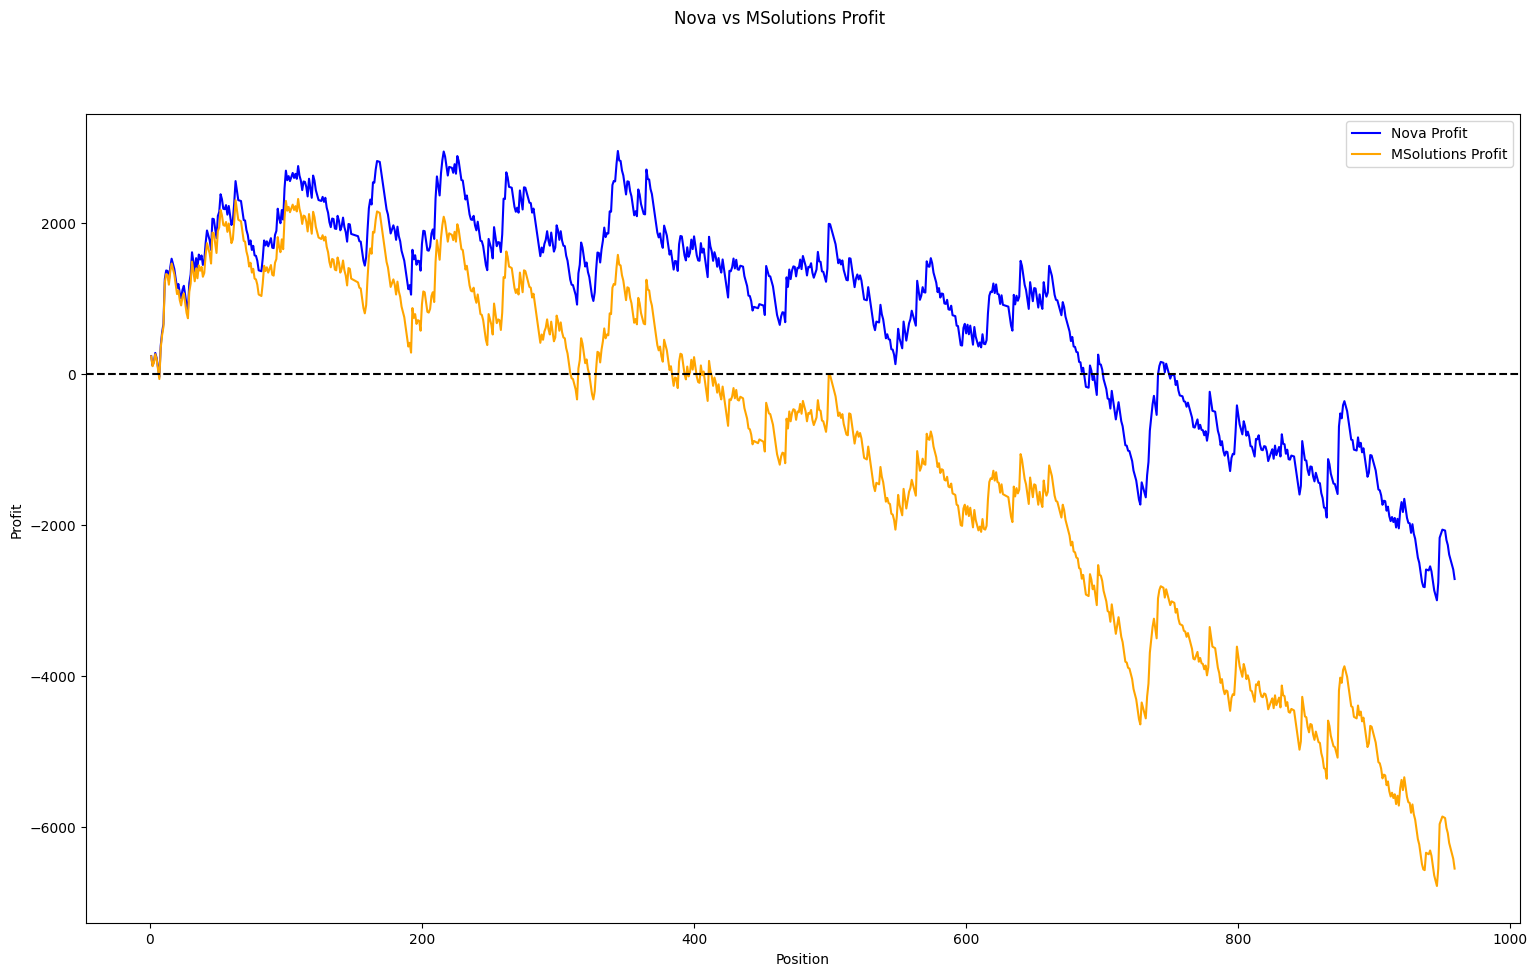

In [235]:
# graph nova_profit_dollars and msolutions_profit_dollars over cum_position_count
fig, ax = plt.subplots()
ax.plot(profit_df['nova_cum_sum'], label='Nova Profit', color='blue')
ax.plot(profit_df['msolutions_cum_sum'], label='MSolutions Profit', color='orange')
# add in a line for 0 
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Position')
ax.set_ylabel('Profit')
fig.suptitle('Nova vs MSolutions Profit')
# increase the size of the chart
fig.set_size_inches(18.5, 10.5)
# Add legend
ax.legend()
# Show the plot
plt.show()


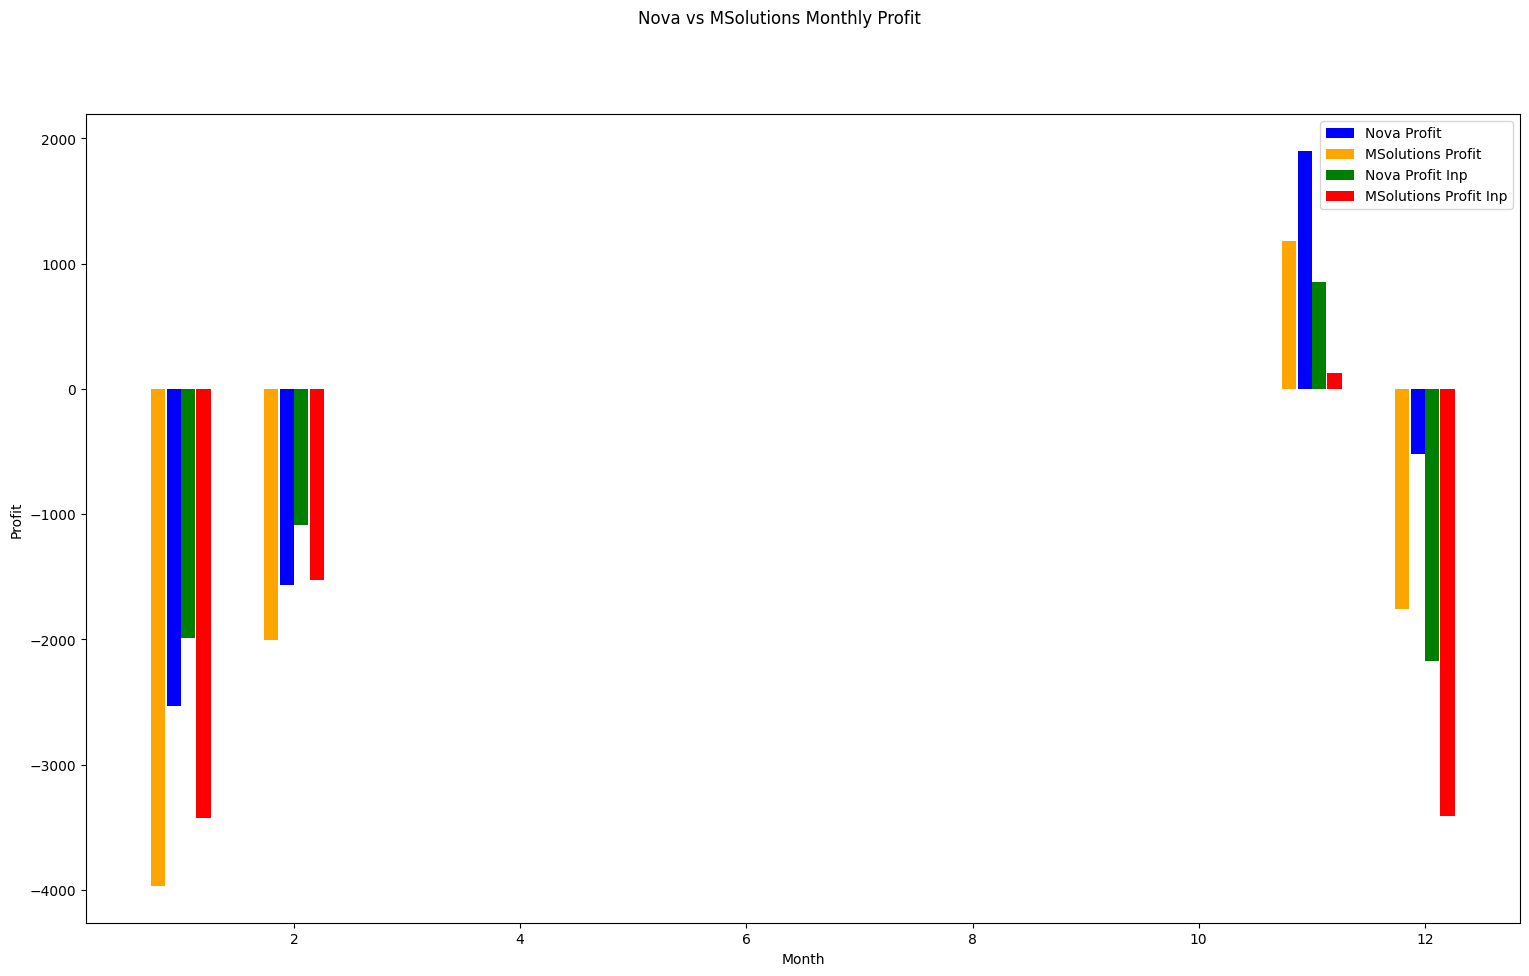

In [236]:
fig, ax = plt.subplots()
width = 0.5

# convert the index to an integer
profit_df_monthly['month'] = profit_df_monthly.index.month
# add a column for the month name
profit_df_monthly['month_name'] = profit_df_monthly.index.strftime('%B')
# profit_df_monthly

# Nova Profit
ax.bar(profit_df_monthly.month - width/8, profit_df_monthly['nova_profit'], label='Nova Profit', color='blue', width=width/4)

# MSolutions Profit
ax.bar(profit_df_monthly.month - width/2.5, profit_df_monthly['msolutions_profit'], label='MSolutions Profit', color='orange', width=width/4)

# set the x axis to be the month name
# ax.set_xticks(profit_df_monthly.month_name)

ax.set_xlabel('Month')
ax.set_ylabel('Profit')
fig.suptitle('Nova vs MSolutions Monthly Profit')
fig.set_size_inches(18.5, 10.5)
ax.legend()
plt.show()


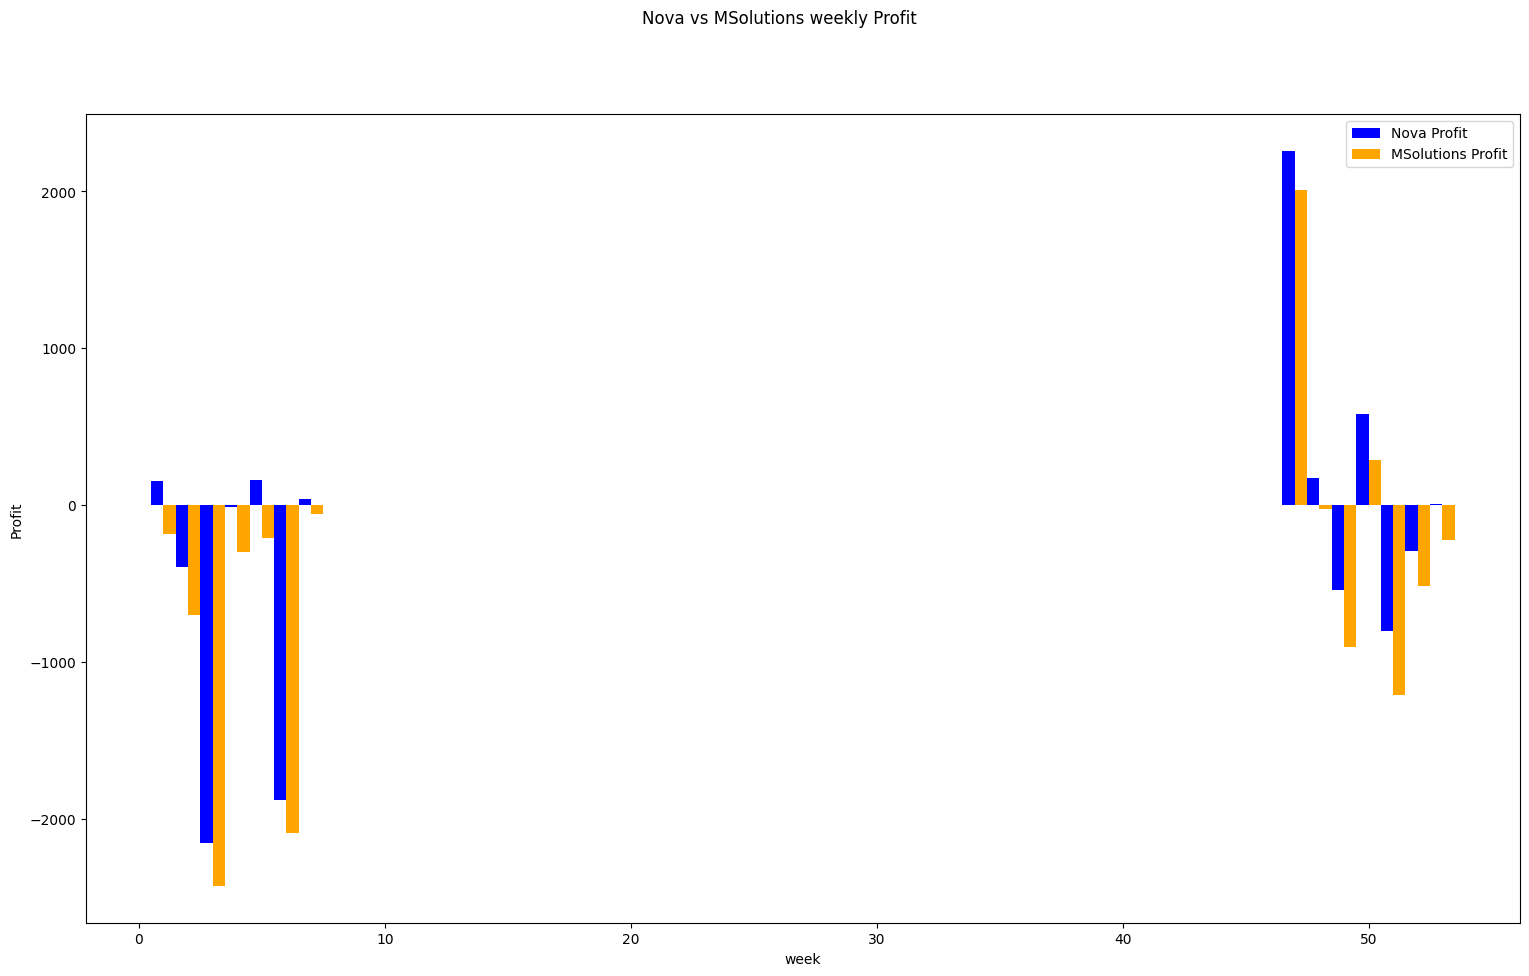

In [237]:
fig, ax = plt.subplots()
width = 0.5

# convert the index to an integer
profit_df_weekly['week'] = profit_df_weekly.index.isocalendar().week
# add a column for the week name
profit_df_weekly['week_name'] = profit_df_weekly.index.strftime('%U')
# convert the week_name to an integer
profit_df_weekly['week_name'] = profit_df_weekly['week_name'].astype(int)
# profit_df_weekly

# Nova Profit
ax.bar(profit_df_weekly.week_name - width/2, profit_df_weekly['nova_profit'], label='Nova Profit', color='blue', width=width)

# MSolutions Profit
ax.bar(profit_df_weekly.week_name + width/2, profit_df_weekly['msolutions_profit'], label='MSolutions Profit', color='orange', width=width)

# Nova Profit Input
# ax.bar(profit_df_weekly.week + width/8, profit_df_weekly['nova_profit_inp'], label='Nova Profit Inp', color='green', width=width/4)

# # MSolutions Profit Input
# ax.bar(profit_df_weekly.week + width/2.5, profit_df_weekly['msolutions_profit_inp'], label='MSolutions Profit Inp', color='red', width=width/4)

# set the x axis to be the week name
# ax.set_xticks(profit_df_weekly.week_name)

ax.set_xlabel('week')
ax.set_ylabel('Profit')
fig.suptitle('Nova vs MSolutions weekly Profit')
fig.set_size_inches(18.5, 10.5)
ax.legend()
plt.show()


In [238]:
# what is the median of nova_profit
nova_median = profit_df_weekly['nova_profit'].median()
print('Nova Median: ', nova_median)
# what is the average
nova_mean = profit_df_weekly['nova_profit'].mean()
print('Nova Mean: ', nova_mean)

Nova Median:  -4.419455202634921
Nova Mean:  -194.2278137275641


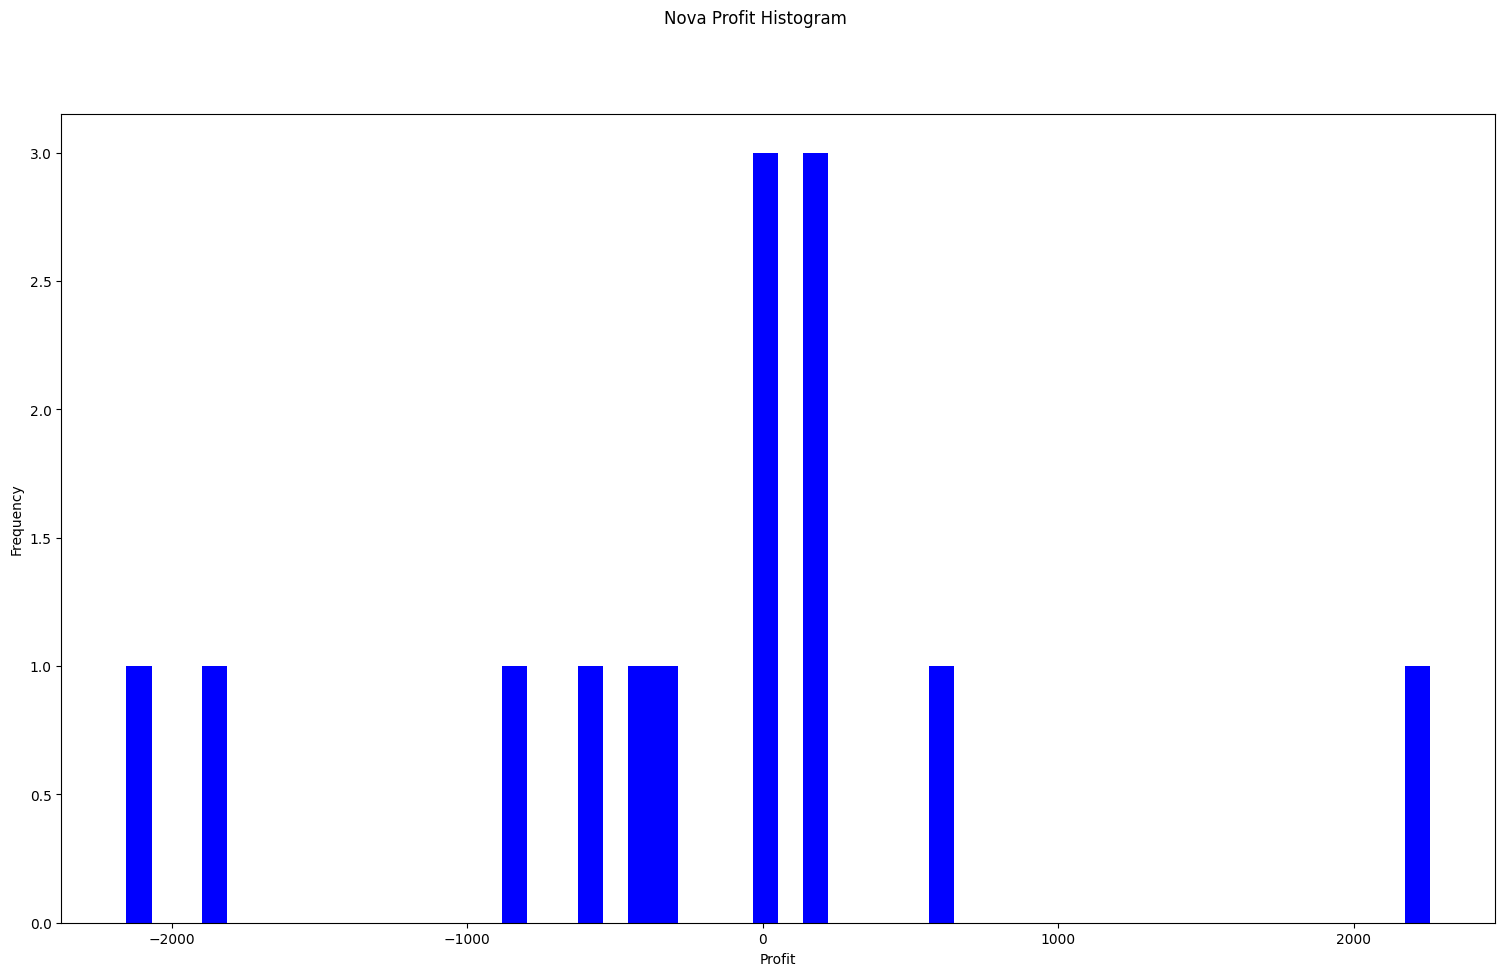

In [239]:
# create a histogram of the nova_profit for each week
fig, ax = plt.subplots()
ax.hist(profit_df_weekly['nova_profit'], bins=52, color='blue')
ax.set_xlabel('Profit')
ax.set_ylabel('Frequency')
fig.suptitle('Nova Profit Histogram')
fig.set_size_inches(18.5, 10.5)
plt.show()


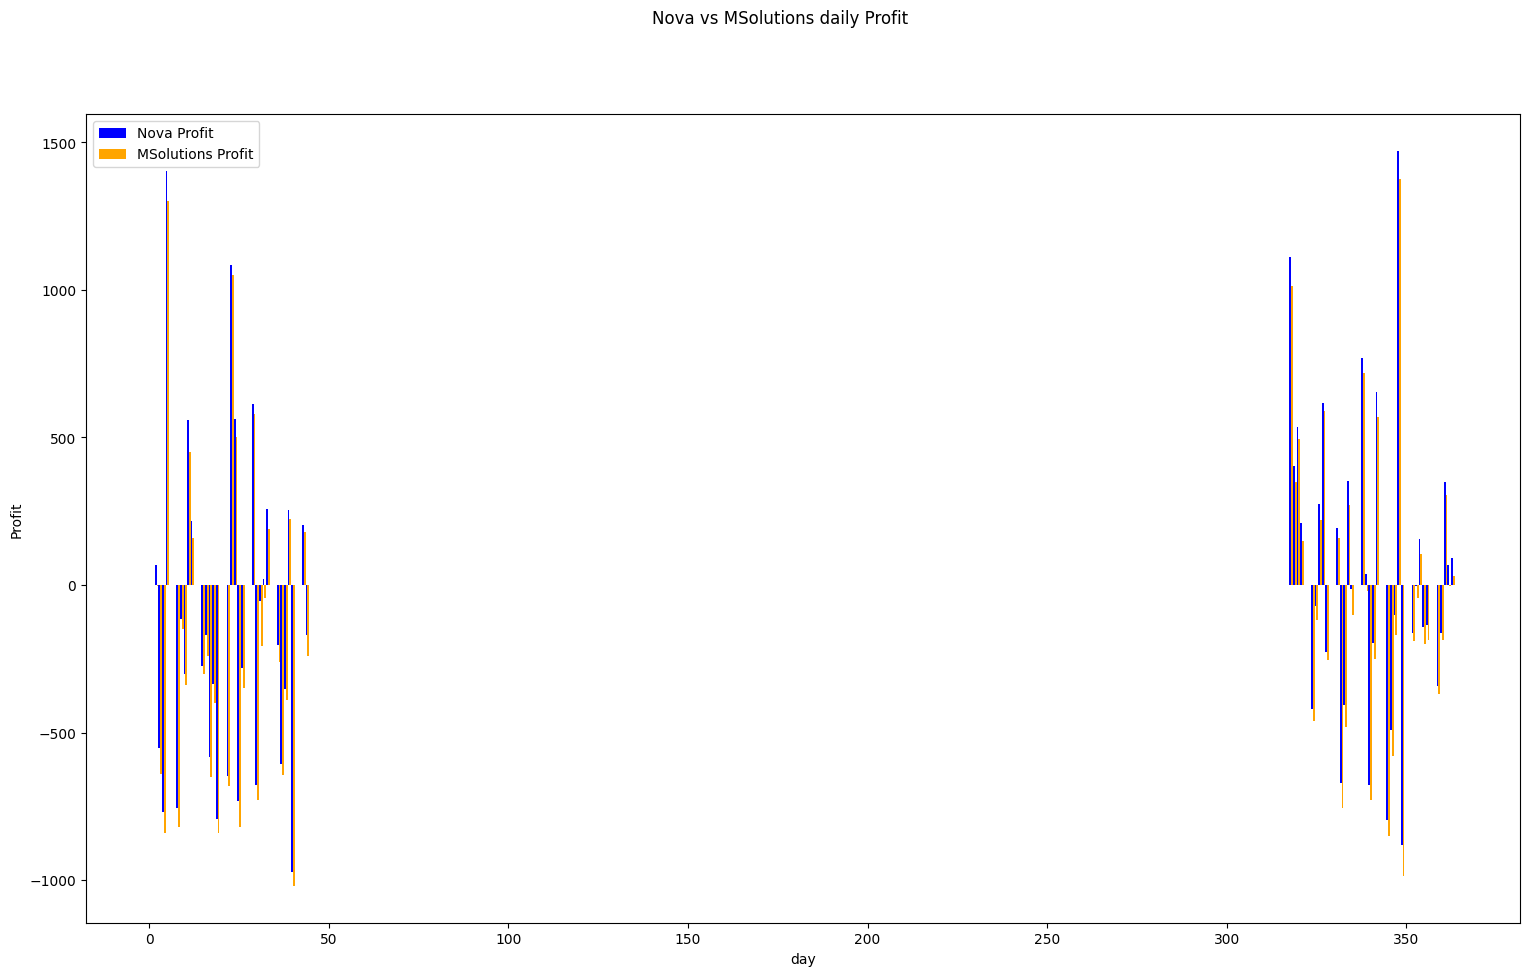

In [240]:
fig, ax = plt.subplots()
width = 0.5

# convert the index to an integer
profit_df_daily['day_number'] = profit_df_daily.index.dayofyear 
# add a column for the 
profit_df_daily['day_name'] = profit_df_daily.index.strftime('%U')
# convert the dai_name to an integer
profit_df_daily['day_name'] = profit_df_daily['day_name'].astype(int)
# profit_df_daily

# Nova Profit
ax.bar(profit_df_daily.day_number - width/2, profit_df_daily['nova_profit'], label='Nova Profit', color='blue', width=width)

# MSolutions Profit
ax.bar(profit_df_daily.day_number + width/2, profit_df_daily['msolutions_profit'], label='MSolutions Profit', color='orange', width=width)

ax.set_xlabel('day')
ax.set_ylabel('Profit')
fig.suptitle('Nova vs MSolutions daily Profit')
fig.set_size_inches(18.5, 10.5)
ax.legend()
plt.show()


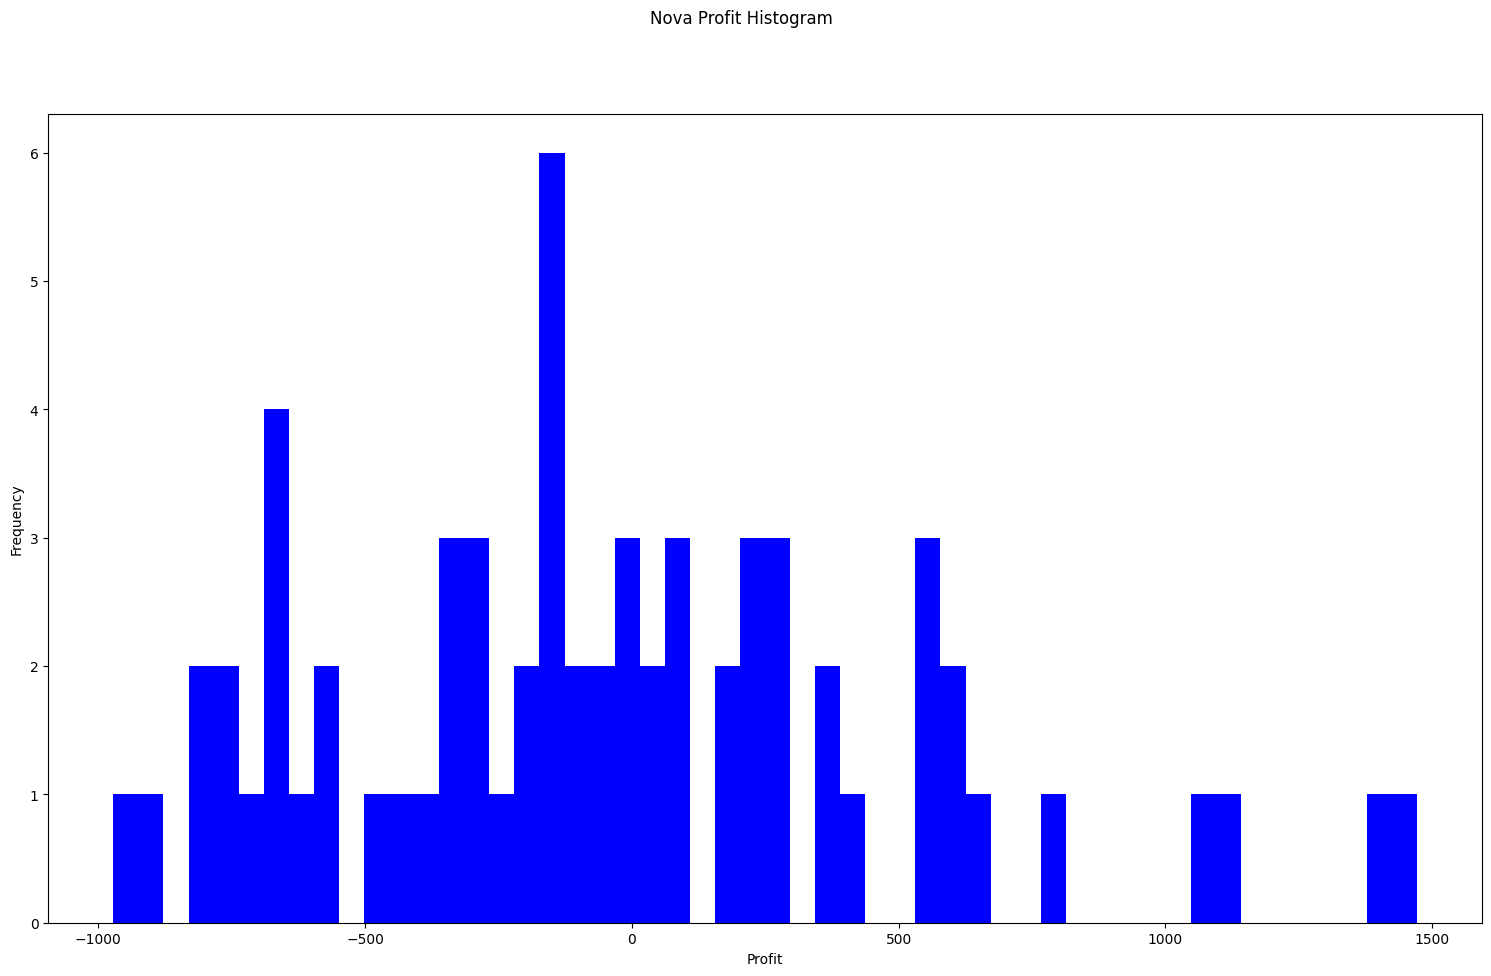

In [241]:
# create a histogram of the nova_profit for each week
fig, ax = plt.subplots()
ax.hist(profit_df_daily['nova_profit'], bins=52, color='blue')
ax.set_xlabel('Profit')
ax.set_ylabel('Frequency')
fig.suptitle('Nova Profit Histogram')
fig.set_size_inches(18.5, 10.5)
plt.show()


In [242]:
# show the bins and counts from histogram in a table
nova_profit_hist = np.histogram(profit_df_daily['nova_profit'], bins=52)
# put this into a pandas dataframe
nova_profit_hist_df = pd.DataFrame({'bin': nova_profit_hist[1][:-1], 'count': nova_profit_hist[0]})
nova_profit_hist_df


,bin,count
0,-972.000000,1
1,-925.018967,1
2,-878.037935,0
3,-831.056902,2
4,-784.075870,2
5,-737.094837,1
6,-690.113805,4
7,-643.132772,1
8,-596.151739,2
9,-549.170707,0


In [243]:
# how many entry times were within 5 minutes of 8:30 am
# separate the hours and minutes from the entry_time column
profit_df['entry_time'] = pd.to_datetime(profit_df['entry_time'])
profit_df['entry_hour'] = profit_df['entry_time'].dt.hour
profit_df['entry_minute'] = profit_df['entry_time'].dt.minute

# if the entry_hour is 8 and the entry_minute is between 25 and 35 then add a column called 'entry_8_30' and set it to 1
profit_df['entry_8_30'] = np.where((profit_df['entry_hour'] == 8) & (profit_df['entry_minute'] >= 25) & (profit_df['entry_minute'] <= 35), 1, 0)
# find the sum of the entry_8_30 column
entry_8_30_count = profit_df['entry_8_30'].sum()
print('Entry 8:30 Count: ', entry_8_30_count)

Entry 8:30 Count:  2


## Hour distribution

In [244]:
# find the win rate grouped by entry_hour
win_rate_by_hour = profit_df.groupby('entry_hour').agg({'nova_profit': lambda x: (x > 0).sum() / x.count()})
win_rate_by_hour

,nova_profit
entry_hour,
0,0.200000
1,0.230769
2,0.533333
3,0.368421
4,0.117647
5,0.428571
6,0.000000
7,0.142857
8,0.333333


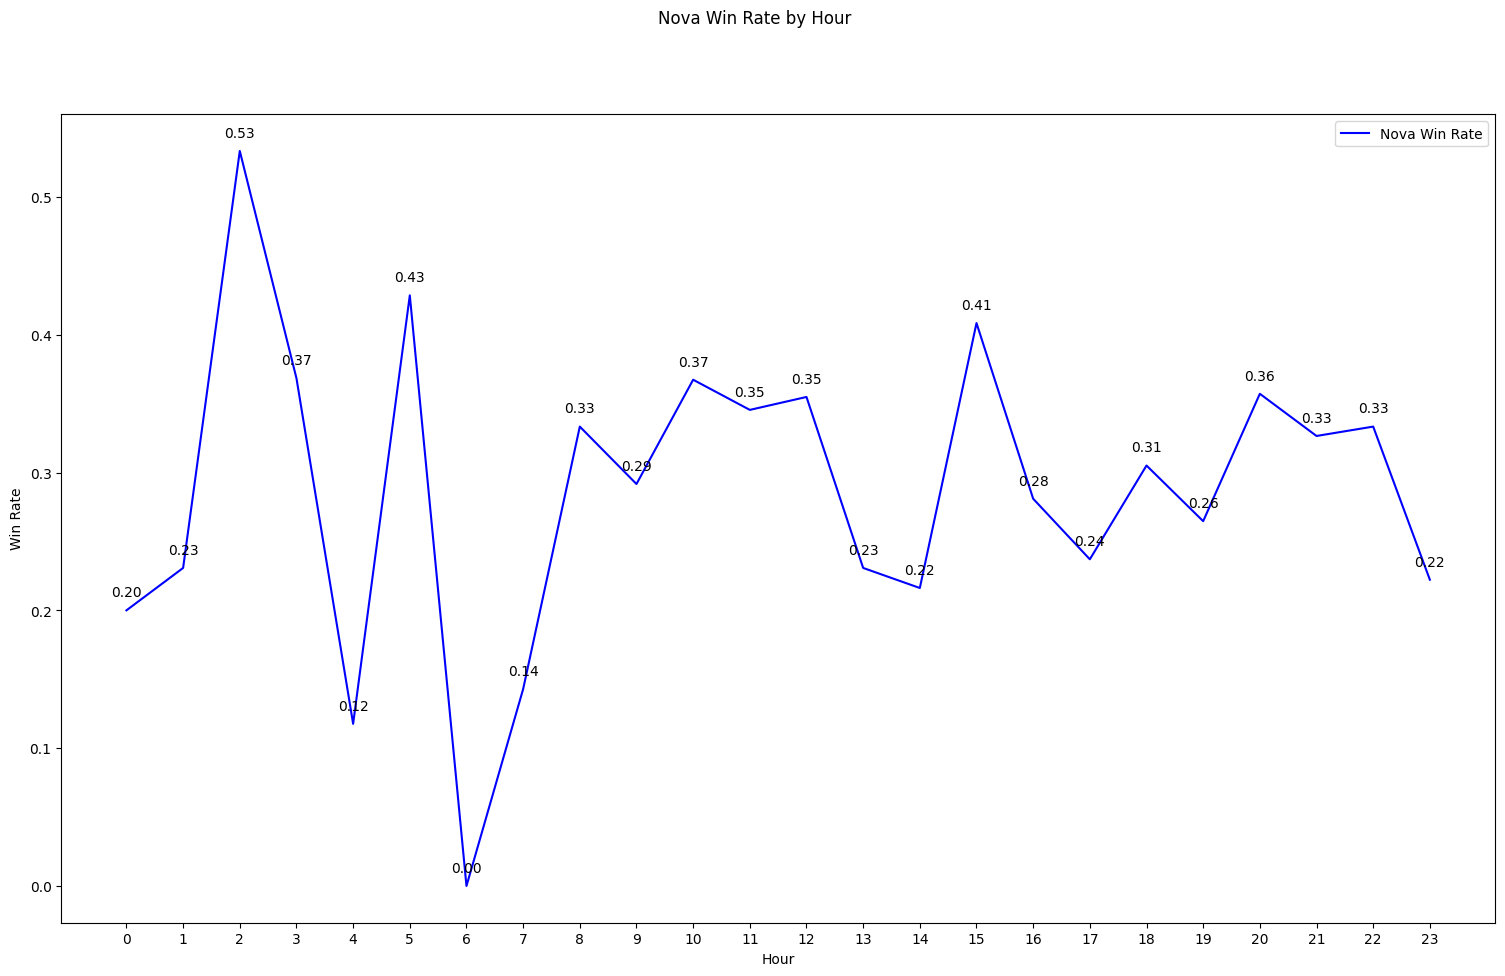

In [245]:
# create a line graph of the win rate by hour
fig, ax = plt.subplots()
ax.plot(win_rate_by_hour.index, win_rate_by_hour['nova_profit'], label='Nova Win Rate', color='blue')
# show the values for x and y next to the points
for i, txt in enumerate(win_rate_by_hour['nova_profit']):
    ax.annotate(f'{txt:.2f}', (win_rate_by_hour.index[i], win_rate_by_hour['nova_profit'][i]), textcoords="offset points", xytext=(0,10), ha='center')
# show all of the ticks on the x axis
ax.set_xticks(win_rate_by_hour.index)
ax.set_xlabel('Hour')
ax.set_ylabel('Win Rate')
fig.suptitle('Nova Win Rate by Hour')
fig.set_size_inches(18.5, 10.5)
ax.legend()
plt.show()


In [246]:
# filter out any rows that have entry_hour as 
low_win_perc_hrs = [0, 22, 23] #20, 21,
low_win_perc_removed = profit_df[~profit_df.entry_hour.isin(low_win_perc_hrs)]
# find the sum of nova profit for low_win_perc_removed
print(low_win_perc_removed['nova_profit'].sum(), profit_df['nova_profit'].sum())
# 450,269.5324621328 436,764.53246210545 (0,7,22,23)
# 447,864.53246212745 436,764.53246210545 - nighttime hours (0,22,23)


-2101.18939218594 -2719.1893921859


In [247]:
# export the profit_df to a csv
# profit_df.to_csv('profit_df.csv')